

![The Close AGN Reference Survey](images/cars.png "The Close AGN Reference Survey")

# A Tour of CARS MUSE Data Products
[Dr. Grant Tremblay](http://www.granttremblay.com) | Harvard-Smithsonian Center for Astrophysics | grant.tremblay @ cfa.harvard.edu

*... on behalf of PI [Dr. Bernd Husemann](http://bhusemann-astro.org/) and the [CARS Team](http://www.cars-survey.org/?q=team)*

[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)

![Learn to make this movie](images/movie.gif)

<a id='contents'></a>
### Contents

1. [An overview of CARS, MUSE and our Data Products](#overview)

2. [Download the Tutorial Data and Setup Python](#setup)

3. [CARS Data: The Basics](#carsdata)

4. [Genearte Stellar Kinematics Maps](#stellarkinematics)

5. [Generate Gas Kinematics Maps](#gaskinematics)

6. [Added by Becky and Bryan, look at individual spectra](#full)

7. [Make a movie of H$\alpha$ velocity structure!](#movie)

<a id='overview'></a>

### About CARS


The [Close AGN Reference Survey](http://www.cars-survey.org/) has recently completed three dimensional (spatial+spectral) mapping of nearby ($0.01 < z < 0.06$) Type 1 AGN with the [Multi-Unit Spectroscopic Explorer](https://www.eso.org/sci/facilities/develop/instruments/muse.html) (MUSE), a groundbreaking new Integral Field Unit (IFU) spectrograph on the [Very Large Telescope](http://www.eso.org/public/teles-instr/paranal-observatory/vlt/) (VLT). The program has completed observations of 35 Quasar host galaxies from the Bertram *et al.* (2007) Type 1 AGN sample, all of which enjoy a rich and growing suite of multiwavelength archival data, including new CARS observations from *HST*, ALMA, Gemini, the VLT, and SOAR. 

CARS leverages systematic, multiwavelength mapping to shine light into the "black box" that characterizes many aspects of the AGN feedback paradigm, enabling a better understanding of the conditions of star formation in QSO host galaxies, quenching via AGN-driven outflows, and the galaxy-scale (im)balance of AGN feeding vs. feedback. While kinetic and radiative energy from black holes is now routinely invoked to inhibit star formation and overcooling in galaxy evolution models, very little is known about how this energy actually couples to the ambient kpc-scale gaseous environment, and *direct* (rather than circumstantial) evidence for the so-called "quenching" of star formation remains elusive. By leveraging the unique capabilities of MUSE combined with highly multiwavelength ancillary datasets, CARS is designed to make significant progress in this regard. 

To that end, the [CARS Team](http://www.cars-survey.org/?q=team) is delighted to present high-level MUSE data products to the community.


### About our MUSE Data Products


I have assembled this tutorial to acquaint those new to CARS with our MUSE data products. [Basic familiarity with Python is assumed](https://www.fullstackpython.com/best-python-resources.html).  

[MUSE](https://www.eso.org/sci/facilities/develop/instruments/muse.html) is a high-througput,
wide-FOV, image-slicing optical integral field unit (IFU) spectrograph mounted to
UT4's Nasmyth B focus on the [Very Large Telescope](http://www.eso.org/public/teles-instr/paranal-observatory/vlt/) (VLT). In a single pointing, the instrument obtains 90,000 simultaneous spectra covering $4750 < \lambda < 9300$ \AA  over a $1'\times1'$ field of view. The seeing-limited point spread function of the instrument is sampled by $0.2''$ spaxels.

The CARS team has consumed many hours of wall clock and CPU time 
in the creation of high-level and science-ready MUSE data products. This should allow you to go "straight to the science", without having to worry about the more subtle and complicated aspects of MUSE data reduction. We've taken care of that for you! 

Here's what we've done: 

**1. Initial Reduction** | The raw data are initially reduced using the standard MUSE pipeline,
automating bias subtraction, wavelength and flux calibration, as well as
illumination-, flat-field, and differential atmospheric diffraction corrections.
In addition to the sky subtraction automated by the pipeline, which
uses a model created from a "blank sky" region of the FoV,
we have performed an additional sky subtraction
using a Principal Component Analysis (PCA) code (to be made public by the CARS team at some point soon). We also correct each cube for 
Galactic foreground extinction using an $A_V$ measured from 
the Schlafly *et al.* recalibration of the Schlegel *et al.* *IRAS+COBE* Milky Way Dust map assuming  $R_V=3.1$. All CARS 
MUSE observations were carried out with a standard three-point 
dither plus field rotation.  Most CARS MUSE data were obtained with seeing of roughly 1 arcsecond. The cubes have been binned `2x2` if the seeing was worse than $0.8''$.  

**2. QSO / Host Galaxy Deblending** | By design, CARS targets Type 1 AGN, which means that all of our targets feature a bright nuclear point source associated with the accreting supermassive black hole in each galaxy's center. We use `QDeblend3D` (Husemann *et al.* 2013, 2014)
to empirically construct the AGN PSF from the intensity distribution 
of broad AGN emission lines including broad H$\beta$, H$\alpha$, and 
OI $\lambda4448$. We then interpolate the PSF in wavlength space, pixel by pixel, using a 2nd order polynomial 
after normalizing the brightest pixel to unity. We then 
iteratively construct an "AGN-only" datacube that encodes
the wavevelength dependence of the quasar PSF, and subtract this 
cube from the original reduced MUSE cube. The residual cube, then, 
contains only the host galaxy signal, albeit with some AGN oversubtraction in some channels (because the host galaxy 
contributes to every channel, even those where the AGN is brightest). To mitigate this efect, we iteratively subtract the residual host galaxy 
spectrum from the initial AGN spectrum, taking into account
the surface brightness distribution of the host as inferred
from broad-band photometry. In most cases, the process converges
after 5-10 iterations. 


**3. Stellar Conitnuum and Nebular Emission Line Fitting** |  We then create higher level CARS/MUSE data
products by decoupling and modeling the stellar and nebular components of the galaxy
with `PyParadise` (Husemann, Choudhury & Walcher *et al.*, in prep.).
`PyParadise` iteratively performs non-negative linear least-squares fitting of
stellar population synthesis templates to the stellar spectrum of every relevant
spectral pixel ("spaxel")
in the MUSE cube, while independently finding the best-fit line-of-sight
velocity distribution with a  Markov Chain Monte Carlo (MCMC) method.
The best-fit stellar spectrum is then subtracted from each spaxel,
yielding residuals that contain nebular emission lines. These are fit with a
linked chain of Gaussians that share a common radial velocity, velocity dispersion,
and priors on expected emission line ratios (e.g., the line ratios of the [OIII] and [NII] doublets are fixed to 1:3).
Uncertainties on all best-fit stellar and nebular parameters
are then estimated using a Monte-Carlo bootstrap approach wherein
both continuum and emission lines
are re-fit 100 times as the spectrum is
randomly modulated within the error of each spaxel.

At the end, we're left with FITS tables that encode the kinematics of both the stellar and nebular components of the galaxy, alongside a careful accounting of their associated errors. 

In this tutorial, I'll take you on a simple "guided tour" of these data products. My advice is to make sure you understand every single line of Python below. If you don't understand what a line of code is doing, please let me know! You can email me any time at `grant.tremblay {at} cfa.harvard.edu`. 




<a id='setup'></a>
### Download Tutorial Data & Setup Python
[Return to Top](#contents)


#### Make sure your Python is working

This tutorial assumes that you, at minimum, have a working knowledge of Python. If not, don't worry: [Python is pretty easy to learn](https://www.reddit.com/r/learnpython/wiki/index). If you're familiar with the absolute basics of Python, but not super comfortable with it, then please do [read this guide](http://docs.python-guide.org/en/latest/). I think it's one of the very best. 

I *__very strongly__* recommend using the [Anaconda Python Distribution](https://www.anaconda.com/download/#linux), which will provide you everything you need out of the box, and give you a clean platform with which you can manage multiple environments (e.g. Python 3 and 2, [Astroconda](https://astroconda.readthedocs.io/en/latest/), etc.). Familiarity with [Astropy](http://www.astropy.org) is also strongly recommended. [We've got some great tutorials](http://www.astropy.org/astropy-tutorials/), so check them out if you're newer to Python and Astropy. 

Also, [it's no longer 2014](https://www.google.com/search?q=today%27s+date&oq=today%27s+date&aqs=chrome.0.0l6.2776j0j1&sourceid=chrome&ie=UTF-8), so [you should be using Python 3.X](http://docs.python-guide.org/en/latest/). 

Anyway, if you've set up Python properly, then hit __cntrl+enter__ on the cell below. 

In [4]:
import os
import sys
import glob

import warnings
warnings.filterwarnings('ignore') # Some things we'll be doing throw runtimewarnings that we won't care about. 

from astropy.io import fits
from astropy.wcs import WCS

import astropy.constants as const
import astropy.units as u
from astropy.visualization import astropy_mpl_style

import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

### This is magic for Jupyer Notebooks. 
### Delete if putting into a script!
%matplotlib inline 
#######################################

import imageio 

Did you get any errors? If you're using Anaconda, you shouldn't have. If you're error-free, proceed below!

<a id='download'></a>

#### Make sure you have the necessary tutorial data

1. [Download a tarball of the necessary CARS/MUSE Tutorial datasets here](https://www.dropbox.com/s/pxjdfix0tvvx6wl/CARS_MUSE_Tour_data.tar.gz?dl=0). It's a 1 GB download (sorry!). 

2. Unzip the file (`tar -xvzf CARS_MUSE_Tour_data.tar.gz`), and place the resultant `data/` directory anywhere you'd like. If you place `data/` in the same directory that this Jupyter Notebook sits, you don't need to change `cars_data_directory` below. 

3. If you put `data/` anywhere other than the directory in which this Jupyter Notebook sits, you must edit the `cars_data_directory` cell below to point to the full (or relative) PATH of your data directory. __Don't forget the trailing slash__!

In [5]:

galaxy = 'HE0045-2145'#'HE0045-2145'#MUSE/HE0150-0344/
cars_data_directory = 'MUSE/'+str(galaxy)+'/'

Make sure that all necessary data files are visible to this notebook: 

In [6]:
necessary_files = set([str(galaxy)+'.kin_table.fits', str(galaxy)+'.eline_table.fits', str(galaxy)+'_FOV_SDSSr.fits'])
found = []

for file in necessary_files:
    found.append(os.path.isfile(cars_data_directory + file))

if all(found):
    print("Tutorial data found.")
else:
    print("I can't find the tutorial data! Nothing will work below until the problem is fixed. See the cell above for help in downloading, unzipping, and placing the data.")

Tutorial data found.


If the above cell found the necessary data and notified you as such, proceed below. If not, [fix it!](#download)


<a id='carsdata'></a>
## CARS Data Products: The Basics
[Return to Top](#contents)


`cars_data_directory` includes all of the standard CARS/MUSE data products. Let's take a look: 

In [7]:
os.listdir(cars_data_directory)

['HE0045-2145_FOV_SDSSr.fits',
 'HE0045-2145_FOV_SDSSg.fits',
 'HE0045-2145.stellar_table.fits',
 '.DS_Store',
 'fitting',
 'images',
 'HE0045-2145grimap.png',
 'HE0045-2145.eline_table.fits',
 'HE0045-2145.kin_table.fits',
 'HE0045-2145_FOV_SDSSi.fits',
 'HE0045-2145.unbinned.fits.gz',
 'HE0045-2145.unbinned.fits']

Here's what each of these products are: 


```
*binned.fits = The cleaned, binned, sky-subtracted, extinction corrected MUSE datacube. 
*eline_table.fits =Emission line kinematics table from PyParadise fitting. 
*stellar_table.fits = Stellar kinematics table from PyParadise fitting.
*kin_table.fits = Stellar kinematics taking into account Voronoi bins.
*QSO_full.fits = QSO/Host galaxy deblending model. Remember, these are Type 1 AGN!***
*cont_model.fits = Stellar continuum model subtracted from each spaxel.
*eline_model.fits = Best fit model to the residuals, i.e. the nebular component. 
*FOV*.fits = Collapsed MUSE 'images' meant to mimic imaging in various filters. 
```

\***QSO/Host galaxy debplending has already been done, you don't need to worry about it!

The MUSE target we're using for this example is **HE0227-0913 / Mrk 1044)** ([NED entry](http://ned.ipac.caltech.edu/ui/?q=objsearch&out_equinox=J2000.0&objname=Mrk%201044&hconst=73&omegav=0.73&out_csys=Equatorial&corr_z=1&list_limit=5&of=pre_text&obj_sort=RA%20or%20Longitude&extend=no&img_stamp=YES&omegam=0.27)) at a redshift of $z=0.01645$. 

Let's populate some relevant information that we'll need for this galaxy below. 

In [8]:
z = 0.021 # The redshift, which I just grabbed from NED. Doesn't need to be too exact for our purposes.  
cz = z * const.c.to('km/s') # The stellar systemic velocity that we'll subtract off of our velocity maps. I always use Astropy Units - read up on them if you're not famililar!

#### Construct a World Coordinate System (WCS) for the galaxy

Let's use standard `astropy.io.fits` syntax to read in the header and image data for the *collapsed* (2-dimensional) "pseudo-r-band" image we've made by collapsing a section of the muse CUBE. 

In [9]:
fov_g = cars_data_directory + str(galaxy)+'_FOV_SDSSg.fits'
fov_r = cars_data_directory + str(galaxy)+'_FOV_SDSSr.fits'
fov_i = cars_data_directory + str(galaxy)+'_FOV_SDSSi.fits'

The Header Data Unit (HDU) is the highest-level component of the FITS structure. A FITS file, be it an image or a table, can contain any number of HDUs stacked one after the other. I don't want to digress too far in describing the FITS standard, though. [All you really need to know is here](https://fits.gsfc.nasa.gov/fits_primer.html). 

In [10]:
hdu_g = fits.open(fov_g) # Open the .fits file, return a list of Header/Data Units (HDUs). 
hdu_g.info()

hdu_r = fits.open(fov_r) # Open the .fits file, return a list of Header/Data Units (HDUs). 
hdu_i = fits.open(fov_i) # Open the .fits file, return a list of Header/Data Units (HDUs). 

#hdu_wcs = fits.ImageHDU(hdu_g[0].data)


Filename: MUSE/HE0045-2145/HE0045-2145_FOV_SDSSg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      43   (319, 314)   float32   


The actual image data is contained in the second (i.e., index=1) HDU. 

For now, I really only care about the 2D (spatial) dimensions, the image data for the white light image (which we'll just use for a quick-look preview), and the image header (which I'll need for construction of the WCS). 

SIMPLE  =                    T                                                  BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  319 / length of data axis 1                          NAXIS2  =                  314 / length of data axis 2                          EXTEND  =                    T                                                  XTENSION= 'IMAGE   '           / IMAGE extension                                PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'DATA    '           / This extension contains data values            HDUCLASS= 'ESO     '           / class name (ESO format)                        HDUDOC  = 'DICD    '           / document with class description                HDUVERS = 'DICD version 6'     / version

<Figure size 432x288 with 0 Axes>

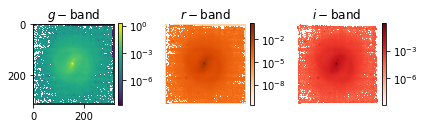

In [135]:
import matplotlib
hdr = hdu_r[0].header
print(hdr)
fovdata = hdu_r[0].data


plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(131)
im0 = ax0.imshow(hdu_g[0].data, norm=matplotlib.colors.LogNorm())
ax0.set_title('$g-$band')

plt.colorbar(im0, fraction = 0.046)
ax1 = fig.add_subplot(132)
im1 = ax1.imshow(hdu_r[0].data, norm=matplotlib.colors.LogNorm(), cmap='Oranges')
ax1.set_title('$r-$band')
ax1.axis('off')
plt.colorbar(im1, fraction = 0.046)
ax2 = fig.add_subplot(133)
im2 = ax2.imshow(hdu_i[0].data, norm=matplotlib.colors.LogNorm(), cmap='Reds')
ax2.set_title('$i-$band')
plt.colorbar(im2, fraction = 0.046)
ax2.axis('off')
plt.tight_layout()
plt.savefig(cars_data_directory+str(galaxy)+'grimap.png', dpi=1000)

dim = hdu_r[0].data.shape
hdu.close() # We no longer need this, so let's close it. We're effectively getting rid of a memory map. 



In [136]:
print("The spatial axes have shape: {} pixels. \nWe'll be using this (i.e., the variable 'dim') later!".format(dim))

The spatial axes have shape: (314, 319) pixels. 
We'll be using this (i.e., the variable 'dim') later!


Generate the World Coordinate System (WCS) for the spatial axes. 

In [137]:
wcs = WCS(hdr, naxis=2)




In [138]:
#wcs.wcs.print_contents()

If you don't understand the cell above, [the Astropy WCS documentation](http://docs.astropy.org/en/stable/wcs/) will be helpful. 

Okay, cool. Let's look at the collapsed R-band image. 

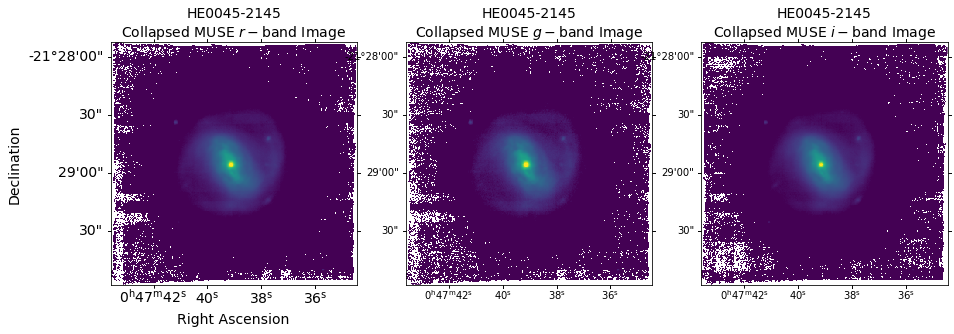

In [153]:
fontsize=14



fig = plt.figure(figsize=(15,5))

ax =fig.add_subplot(131,projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

fovdata_r = hdu_r[0].data
fovdata_r[fovdata_r == 0] = np.nan 
# Reprojection pads the background (where there is no data) with zeroes. 
# This is a problem, because Zero will be mapped to a color in our cmap. We don't want a colored background!
# So, in the line above, I force the background to be a NaN. 

cmap=cm.viridis # Always pick good, perceptually uniform color maps!
cmap.set_bad('white',1) # We set NaNs to be white here. 

ax.set_title(str(galaxy)+'\nCollapsed MUSE $r-$band Image', fontsize=fontsize)

ax.tick_params(labelsize=14)



ax1 =fig.add_subplot(132,projection=wcs)
ax1.axis('off')

fovdata_g = hdu_g[0].data
fovdata_g[fovdata_g == 0] = np.nan 
# Reprojection pads the background (where there is no data) with zeroes. 
# This is a problem, because Zero will be mapped to a color in our cmap. We don't want a colored background!
# So, in the line above, I force the background to be a NaN. 

cmap=cm.viridis # Always pick good, perceptually uniform color maps!
cmap.set_bad('white',1) # We set NaNs to be white here. 

ax1.set_title(str(galaxy)+'\nCollapsed MUSE $g-$band Image', fontsize=fontsize)

ax2 =fig.add_subplot(133,projection=wcs)
ax2.axis('off')

fovdata_i = hdu_i[0].data
fovdata_i[fovdata_i == 0] = np.nan 
# Reprojection pads the background (where there is no data) with zeroes. 
# This is a problem, because Zero will be mapped to a color in our cmap. We don't want a colored background!
# So, in the line above, I force the background to be a NaN. 

cmap=cm.viridis # Always pick good, perceptually uniform color maps!
cmap.set_bad('white',1) # We set NaNs to be white here. 

ax2.set_title(str(galaxy)+'\nCollapsed MUSE $i-$band Image', fontsize=fontsize)



frame = ax.imshow(fovdata_r, origin='lower', norm=LogNorm(), vmin=0.001, vmax=0.5, cmap=cmap, interpolation='None')
frame = ax1.imshow(fovdata_g, origin='lower', norm=LogNorm(), vmin=0.001, vmax=0.5, cmap=cmap, interpolation='None')
frame = ax2.imshow(fovdata_i, origin='lower', norm=LogNorm(), vmin=0.001, vmax=0.5, cmap=cmap, interpolation='None')




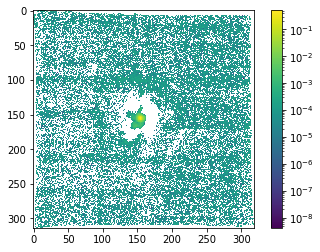

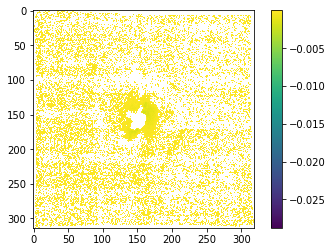

In [161]:
# make a rough g-r colormap

plt.imshow(fovdata_g - fovdata_r, norm = LogNorm())
plt.colorbar()
plt.show()

# if g-r is less than zero
import numpy.ma as ma
plt.imshow(ma.masked_where(fovdata_g - fovdata_r > 0, fovdata_g - fovdata_r))
plt.colorbar()
plt.show()

<a id='stellarkinematics'></a>
### Generate Stellar Kinematics Maps
[Return to Top](#contents)


Unlike emission lines like H$\alpha$, the stellar continuum is *fairly* faint. We've therefore applied Voronoi Binning to increase the S/N of the stellar component. [You can read more about that here](http://www-astro.physics.ox.ac.uk/~mxc/software/#binning). 

Obviously, this seriously degrades the spatial resolution for the stellar compoent. We won't do that for the gas, where we *care* about spatial resolution. We only care about the coarse stellar velocity map, because we can't do better than that anyway!

In [231]:
stars = cars_data_directory + str(galaxy)+'.kin_table.fits' 
#'.kin_table.fits'
#'fitting/binned/' + str(galaxy)+'.stellar_table.fits' 
# The Voronoi-binned Stellar Kinematics Tablegas = cars_data_directory + 'HE0227-0913.eline_table.fits' 
# The UNBINNED Gas kinematics Table



In [232]:
# Read in the stellar table, from which we'll make stellar maps
stellar_hdu = fits.open(stars)
stellar_tab = stellar_hdu[1].data
print(stellar_tab)
stellar_columns = stellar_hdu[1].header
print(stellar_columns)

[( 6,   0, 6212.4795, 289.12845, 270.40363, 134.96976)
 ( 7,   0, 6212.4795, 289.12845, 270.40363, 134.96976)
 ( 8,   0, 6212.4795, 289.12845, 270.40363, 134.96976) ...
 ( 7, 313, 6212.724 , 283.67038, 271.9295 , 135.80988)
 ( 8, 313, 6212.724 , 283.67038, 271.9295 , 135.80988)
 (10, 313, 6212.724 , 283.67038, 271.9295 , 135.80988)]
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   24 / length of dimension 1                          NAXIS2  =                94671 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    6 / number of table fields                         TTYPE1  = 'x_cor   '     

In [233]:
# Make arrays for the spatial coordinates
stellar_x_cor = stellar_tab.field('x_cor')
stellar_y_cor = stellar_tab.field('y_cor')

# Populate arrays for the Stellar Velocity
stellar_vel = stellar_tab.field('vel_fit')

print(stellar_vel)
stellar_vel_err = stellar_tab.field('vel_fit_err')

# ... and the FWHM! 
stellar_fwhm = stellar_tab.field('disp_fit')
stellar_fwhm_err = stellar_tab.field('disp_fit_err')

[6212.4795 6212.4795 6212.4795 ... 6212.724  6212.724  6212.724 ]


Threshold the Stellar data on Signal to Noise

In [234]:
# This just creates a boolean "mask" for the data, showing only S/N > 500 spaxels. 
# We also clip low and high velocity outliers that are near the edge of the FoV. This is bad data.
stellar_select = ((stellar_vel / stellar_vel_err) > 500.0) & (stellar_vel > 6200) & (stellar_vel < 6500)
#(cz.value - 500 )
print(cz)
#& (stellar_vel > 4400 ) & (stellar_vel < 5200)

6295.641618 km / s


Make a "dummy" empty map that is the same shape as the 2D FOV

In [235]:
stellar_vel_map = np.full((dim[0], dim[1]), np.nan)

... and now populate this with our masked stellar velocity data

In [236]:
stellar_vel_map[stellar_y_cor[stellar_select], stellar_x_cor[stellar_select]] = stellar_vel[stellar_select]

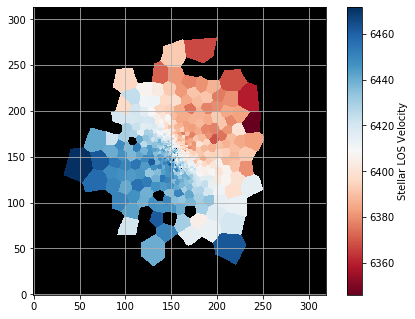

In [238]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])
ax.grid('off')

cmap = cm.RdBu
cmap.set_bad('black',1)

vmin = -500.
vmax = 500.


frame = plt.imshow(stellar_vel_map, origin='center', cmap=cmap, interpolation='None')
cbar = plt.colorbar()

cbar.set_label(r"Stellar LOS Velocity")

Check out that absolutely beautiful Keplerian rotation of the stars. Lovely. This is a nearly face-on galaxy, but it is just inclined enough to show this rotation pattern. The projection of the velocity field along the line of sight is nevertheless small ($v \sin i$) because the inclination is nearly face-on. 

Note that we haven't subtracted off the "hubble flow", i.e. the systemic velocity of the galaxy. Let's do that now. It'll effectively project the rotation around a "zero point" that we set to be the median of the observed velocity field. This is effectively a direct MUSE measurement of the stellar redshift. 

In [239]:
median_stellar_vel = np.median(stellar_vel[stellar_select])

measured_MUSE_redshift = (median_stellar_vel * (u.km/u.s)) / const.c.to('km/s')

print("The stellar systemic velocity as measured by MUSE is z={}".format(measured_MUSE_redshift.round(5)))

The stellar systemic velocity as measured by MUSE is z=0.02139


Really good! Remember that the reported NED redshift was: 

In [240]:
z

0.021

In [271]:
print(median_stellar_vel)
print(stellar_vel[stellar_select])

6413.946
[6440.2705 6440.2705 6440.2705 ... 6367.215  6367.215  6367.215 ]


Let's subtract the stellar systemic velocity from our velocity map: 

In [272]:
stellar_vel_map[stellar_y_cor[stellar_select], stellar_x_cor[stellar_select]] = stellar_vel[stellar_select] - median_stellar_vel 

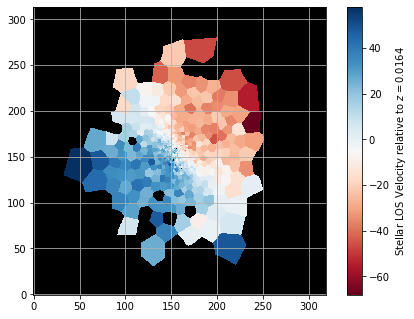

In [273]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])
ax.grid('off')

cmap = cm.RdBu
cmap.set_bad('black',1) # I make the NANs black here because white is included in my colormap, encoding values near zero

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap,  interpolation='None')
cbar = plt.colorbar()

cbar.set_label(r"Stellar LOS Velocity relative to $z=0.0164$")

Remember, you can edit any of these cells to save these figures, etc. I won't get into how to make proper WCS axes for these, but [you can read up on that here](http://www.astropy.org/astropy-tutorials/FITS-images.html). 

I also won't be saving FITS images of these maps, but it's similarly trivial. Use the general example below to save any of the maps made in this tutorial as a FITS image. 

In [38]:
# hdu = fits.PrimaryHDU(stellar_vel_map)
# hdu.header = hdr 
# hdu.writeto('stellar_vel_map.fits',clobber=True,output_verify='fix')

The stellar FWHM map is similarly easy to make follwing the example above, i.e. 

*__REMEMBER__*: $FWHM = 2.35 \sigma$

Be careful when comparing velocity dispersion and FWHM maps!! 

In [241]:
# We're in *such* a high S/N regime that I'm just going to use the same stellar_select 
# boolean mask as above, even though I technically created it based on S/N in the *velocity*
# fit, not with FWHM fit. The Velocity and FWHM maps will therefore have an identical footprint. 
# Really, everything is so high S/N that this is basically not relevant. 

stellar_fwhm_map = np.full((dim[0], dim[1]), np.nan)
stellar_fwhm_map[stellar_y_cor[stellar_select], stellar_x_cor[stellar_select]] = stellar_fwhm[stellar_select]

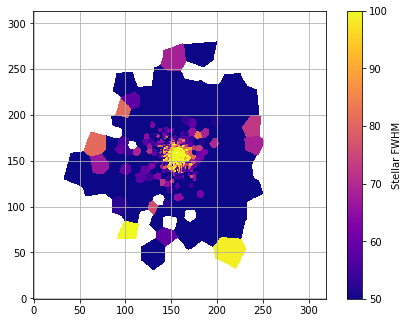

In [243]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

ax.grid('off')

cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(stellar_fwhm_map, vmin=50, vmax=100,origin='lower', cmap=cmap, interpolation='None')
cbar = plt.colorbar()

cbar.set_label(r"Stellar FWHM")

You'll notice I'm being super lazy by not making my label sizes large, not adding proper WCS axes, not adding scale bars (in kpc and arcseconds), etc. *Don't be like me*. Always add scalebars. Always make labels readable. Always use perceptually uniform colormaps. Data vizualization is *important*. 

<a id='gaskinematics'></a>
### Make Velocity and Velocity Dispersion maps for the Emission Line Gas

You should hopefully be getting the hang of this now! 

In [244]:
gas = cars_data_directory + str(galaxy)+'.eline_table.fits' # The UNBINNED Gas kinematics Table

In [245]:
# Read in the emission line table, from which we'll make gas maps
eline_hdu = fits.open(gas)
eline_tab = eline_hdu[1].data

eline_columns = eline_hdu[1].header
print(eline_columns)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  344 / length of dimension 1                          NAXIS2  =                94671 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   86 / number of table fields                         TTYPE1  = 'x_cor   '                                                            TFORM1  = 'J       '                                                            TTYPE2  = 'y_cor   '                                                            TFORM2  = 'J       '                                                            TTYPE3  = 'Halpha_flux'                 

In [246]:
# You can check out the header by uncommenting the line below
# eline_columns

We get a lot of bright, beautiful emission lines in CARS MUSE data. You can see all those we've mapped in the `eline_tab` header (see the cell above). The brightest will be H$\alpha$ (which `PyParadise` has conveniently decoupled from [N II]!) and [O III]. Let's look at only a few of them, for the purposes of this tutorial. 

In [247]:
eline_x_cor = eline_tab.field('x_cor')
eline_y_cor = eline_tab.field('y_cor')

H$\alpha$ $\lambda$6563

In [248]:
Ha_flux = eline_tab.field('Halpha_flux')
Ha_flux_err = eline_tab.field('Halpha_flux_err')
Ha_vel = eline_tab.field('Halpha_vel')
Ha_vel_err = eline_tab.field('Halpha_vel_err')
Ha_fwhm = eline_tab.field('Halpha_fwhm')
Ha_fwhm_err = eline_tab.field('Halpha_fwhm_err')

H$\beta$ $\lambda$4861

In [249]:
Hb_flux = eline_tab.field('Hbeta_flux')
Hb_flux_err = eline_tab.field('Hbeta_flux_err')
Hb_vel = eline_tab.field('Hbeta_vel')
Hb_vel_err = eline_tab.field('Hbeta_vel_err')
Hb_fwhm = eline_tab.field('Hbeta_fwhm')
Hb_fwhm_err = eline_tab.field('Hbeta_fwhm_err')

[O III] $\lambda$5007

In [250]:
OIII5007_flux = eline_tab.field('OIII5007_flux')
OIII5007_flux_err = eline_tab.field('OIII5007_flux_err')
OIII5007_vel = eline_tab.field('OIII5007_vel')
OIII5007_vel_err = eline_tab.field('OIII5007_vel_err')
OIII5007_fwhm = eline_tab.field('OIII5007_fwhm')
OIII5007_fwhm_err = eline_tab.field('OIII5007_fwhm_err')

In [251]:
NII6583_flux = eline_tab.field('OIII5007_flux')
NII6583_flux_err = eline_tab.field('OIII5007_flux_err')
NII6583_vel = eline_tab.field('OIII5007_vel')
NII6583_vel_err = eline_tab.field('OIII5007_vel_err')
NII6583_fwhm = eline_tab.field('OIII5007_fwhm')
NII6583_fwhm_err = eline_tab.field('OIII5007_fwhm_err')

Again, lets mask the data based on a S/N threshold. I could (and should) make a separate mask for each line, but I'm lazy. I'll just make one for H$\alpha$ and apply it to all. 

In [252]:
gas_select = (Ha_flux / Ha_flux_err > 3)

In [253]:
Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_flux[gas_select]

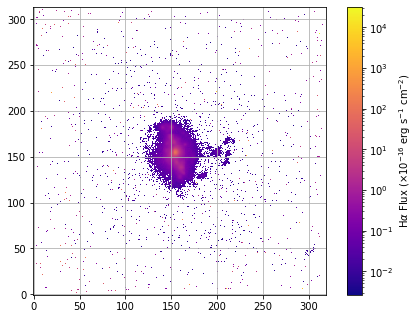

In [254]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"H$\alpha$ Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")

In [255]:
median_Ha_vel = np.median(Ha_vel[gas_select])

In [256]:
Ha_vel_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_vel_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_vel[gas_select] - median_Ha_vel

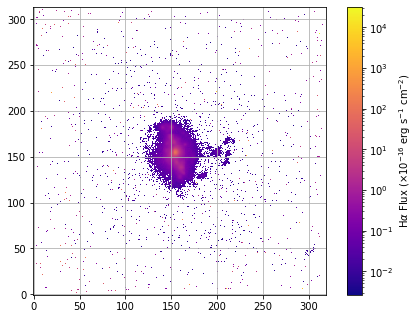

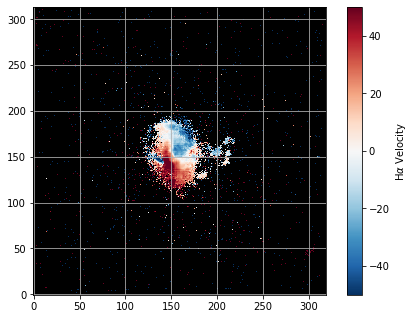

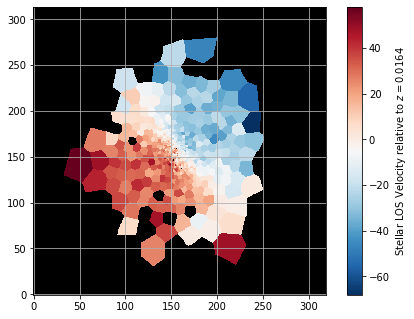

In [277]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"H$\alpha$ Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")

fig = plt.figure()

ax = plt.axes([0,0,1,1])

ax.grid('off')


cmap = cm.RdBu_r
cmap.set_bad('black',1)

frame = plt.imshow(Ha_vel_map, origin='lower', cmap=cmap, vmin=-50, vmax=50, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"H$\alpha$ Velocity")

fig = plt.figure()

ax = plt.axes([0,0,1,1])
ax.grid('off')

cmap = cm.RdBu_r
cmap.set_bad('black',1) # I make the NANs black here because white is included in my colormap, encoding values near zero

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap,  interpolation='None')
cbar = plt.colorbar()

cbar.set_label(r"Stellar LOS Velocity relative to $z=0.0164$")

In [259]:
Ha_fwhm_map = np.full((dim[0],dim[1]), np.nan)
Ha_fwhm_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_fwhm[gas_select]

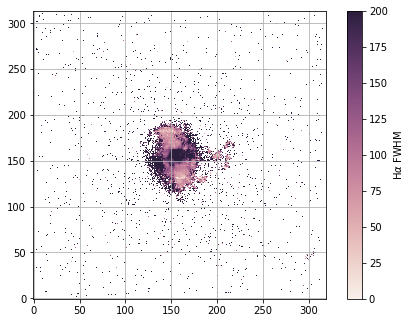

In [260]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])

ax.grid('off')


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)

frame = plt.imshow(Ha_fwhm_map, origin='lower', cmap=cmap, vmin=0, vmax=200, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"H$\alpha$ FWHM")

In [261]:
median_Hb_vel = np.median(Hb_vel[gas_select])
Hb_vel_map = np.full((dim[0],dim[1]) ,np.nan)
Hb_vel_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Hb_vel[gas_select] - median_Hb_vel

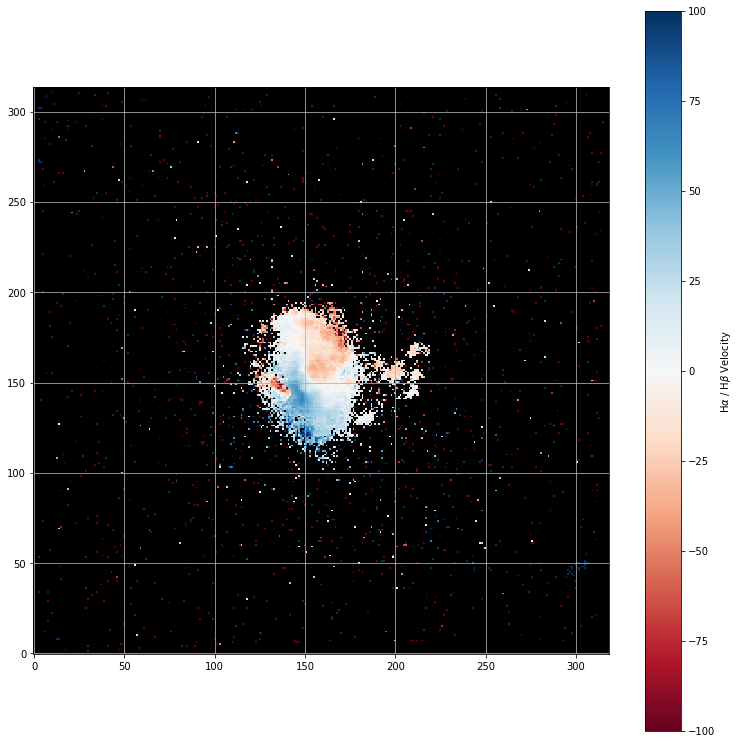

In [292]:
#Halpha and Hbeta have the same velocities

fig = plt.figure(figsize=(10,10))

ax = plt.axes([0,0,1,1])

ax.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(Hb_vel_map, origin='lower', cmap=cmap,vmin=-100, vmax=100 , interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"H$\alpha$ / H$\beta$ Velocity")

In [264]:
test = Ha_vel / Hb_vel

In [265]:
test

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

#### An exercise

Hopefully this should be straightforward to you now. Make some flux, velocity, and velocity dispersion maps for some other lines, e.g. [O III]. While you're at it, try to add a proper WCS (Ra / Dec axis) to the figure. 

### Make Line Ratio maps
[Return to Top](#contents)


It's incredibly powerful to have mapped the kinematics of multiple lines. You can make velocity ratio maps to test if the gas is comoving, etc. There are *tons* of applications here. I can't go into all of them.  

One trivial example is a so-called Balmer Decrement map of extinction throughout the galaxy. This is trivial to make from the H$\alpha$ / H$\beta$ flux ratio map. 

I've already made the H$\alpha$ map above, but I'm going to remake it, along with an H$\beta$ map, with a boolean mask based on the S/N of the H$\beta$ line, because it's much fainter than H$\alpha$. 

In [266]:
balmer_select = (Hb_flux / Hb_flux_err > 3)

ha_image = np.full((dim[0],dim[1]) ,np.nan)
hb_image = np.full((dim[0],dim[1]) ,np.nan)

ha_image[eline_y_cor[balmer_select],eline_x_cor[balmer_select]] = Ha_flux[balmer_select]
hb_image[eline_y_cor[balmer_select],eline_x_cor[balmer_select]] = Hb_flux[balmer_select]

We then need only follow the equations on page 7 of [this paper](https://arxiv.org/pdf/1206.1867.pdf)

In [279]:
def make_balmer_map(ha_image, hb_image, hdr, makeplot=True, writefits=False):

    ratio_observed = ha_image / hb_image
    ratio_intrinsic = 2.86
    k_alpha = 2.63
    k_beta = 3.71

    ebv = (2.5 / (k_beta - k_alpha)) * np.log10(ratio_observed / ratio_intrinsic)
    ebv[ebv < 0] = np.nan # Additional masking

    av = 4.05 * ebv
    nh = 1.8e21 * av # VERY rough, from Predehl & Schmitt, in atoms / cm2

    if makeplot is True:
        fig = plt.figure()

        ax = plt.axes([0,0,1,1])
        
        ax.grid('off')

        cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
        cmap.set_bad('white',1)

        frame = plt.imshow(av, origin='lower', cmap=cmap, vmin=0, vmax=4, interpolation='None')
        cbar = plt.colorbar()
        cbar.set_label(r"Extinction (A$_V$, mag)")
    
    if writefits is True:
        hdu = fits.PrimaryHDU(ebv, header=hdr)
        hdulist = fits.HDUList([hdu])
        hdulist.writeto('ebv.fits', overwrite=True, output_verify='silentfix')
    
        hdu = fits.PrimaryHDU(av, header=hdr)
        hdulist = fits.HDUList([hdu])
        hdulist.writeto('av.fits', overwrite=True, output_verify='silentfix')

        hdu = fits.PrimaryHDU(nh, header=hdr)
        hdulist = fits.HDUList([hdu])
        hdulist.writeto('nh.fits', overwrite=True, output_verify='silentfix')

    return None

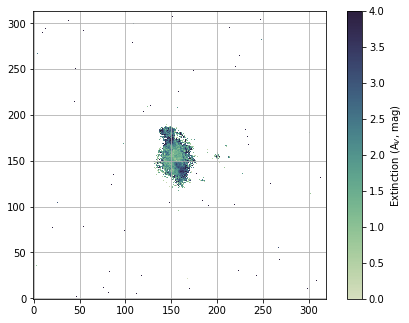

In [280]:
make_balmer_map(ha_image, hb_image, hdr, makeplot=True, writefits=False)

We've just mapped exctinction and (roughly) column density across the entire galaxy. Cool. 

#### Exercise

Try making some other scientifically useful line ratio maps! Can you think of a good proxy for gas electron density, for example? ;) 

<a id='movie'></a>
### Just for fun: Generate a gif movie from slices in a MUSE data cube
[Return to Top](#contents)


Read in the MUSE cube and print its contents.

In [12]:
image_file = cars_data_directory + str(galaxy)+ '.unbinned.fits'
hdulist = fits.open(image_file)
hdulist.info()

Filename: MUSE/HE0045-2145/HE0045-2145.unbinned.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      44   (319, 314, 3682)   float32   
  1  ERROR         1 ImageHDU         9   (319, 314, 3682)   float32   


<a id='full'></a>
### Now, adding a section to look at individual spectra instead of fully reduced quantities
[Return to Top](#contents)

My main questions here are:
1. Is this fully reduced?
2. Do we need to subtract the continuum?

SIMPLE  =                    T                                                  BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  319 / length of data axis 1                          NAXIS2  =                  314 / length of data axis 2                          NAXIS3  =                 3682 / length of data axis 3                          EXTEND  =                    T                                                  XTENSION= 'IMAGE   '           / IMAGE extension                                PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'DATA    '           / This extension contains data values            HDUCLASS= 'ESO     '           / class name (ESO format)                        HDUDOC  = 'DICD    '           / documen

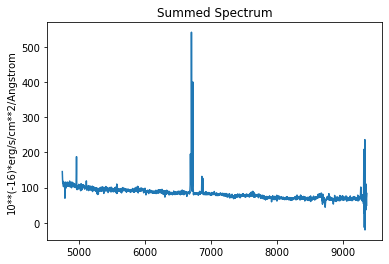

In [23]:
### Try plotting?
print(hdulist[0].header)
# to get the wavelength axis use:
print(np.shape(hdulist[0].data)[0])

xs = np.linspace(0,np.shape(hdulist[0].data)[0]-1,np.shape(hdulist[0].data)[0])
wav = [hdulist[0].header['CRVAL3'] + hdulist[0].header['CDELT3']*x for x in xs]
plt.clf()
plt.plot(wav, np.sum(hdulist[0].data, axis=(1,2)))
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.show()


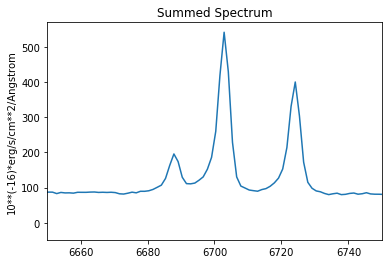

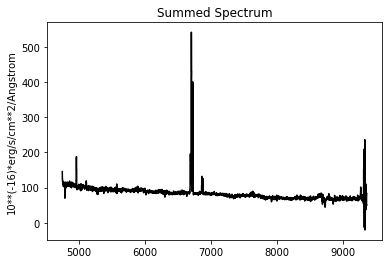

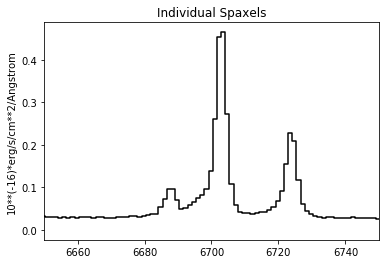

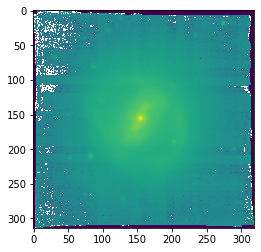

In [56]:
import matplotlib
plt.clf()

plt.plot(wav, np.sum(hdulist[0].data, axis=(1,2)))
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim([6650, 6750])
plt.show()

plt.clf()
#xs, ys = np.histogram(np.sum(hdulist[0].data, axis=(1,2)), bins = wav)
plt.step(wav, np.sum(hdulist[0].data, axis=(1,2)), color='black')
#plt.scatter(ys[:-1],xs, color='black')
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
#plt.xlim([6650, 6750])
plt.show()

plt.clf()

plt.step(wav, hdulist[0].data[:,150,150], color='black')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim([6650, 6750])
plt.show()

plt.imshow(np.sum(hdulist[0].data, axis=0), norm=matplotlib.colors.LogNorm())
plt.show()



0.0041426974
(20,) (20,)
[ 6.48432205e-05 -4.29520933e-01]
best fit for 1 gauss [8.86007762e-03 6.72450319e+03 1.35828752e+00 5.16517391e-03]


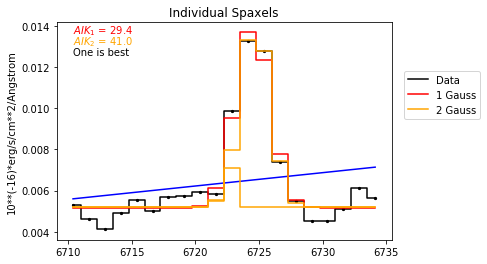

0.0034801448
(20,) (20,)
[ 1.83531504e-05 -1.16960354e-01]
best fit for 1 gauss [ 1.00299051e-02  6.72458318e+03 -1.39824711e+00  5.00808078e-03]


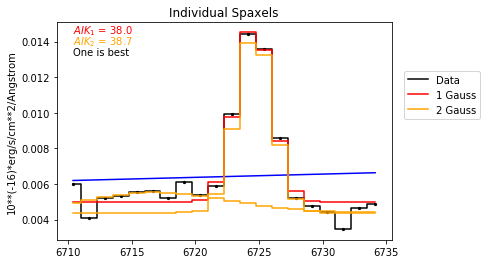

0.0048744413
(20,) (20,)
[ 6.84634230e-05 -4.52649912e-01]
best fit for 1 gauss [5.80160264e-03 6.72452266e+03 1.67545809e+00 6.60415584e-03]


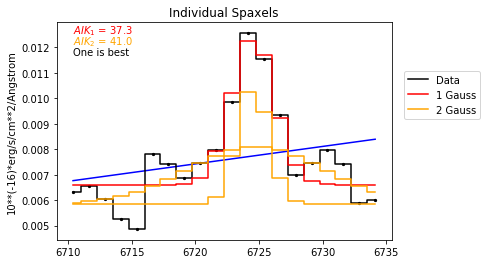

0.004506291
(20,) (20,)
[ 8.57425462e-06 -5.05061841e-02]
best fit for 1 gauss [4.70578899e-03 6.72465186e+03 2.11259141e+00 6.13537737e-03]


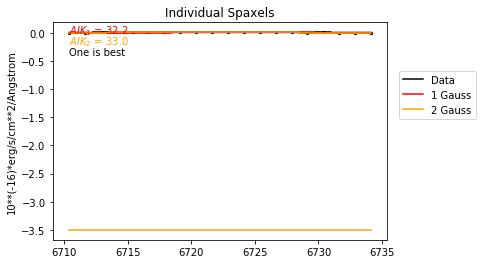

0.006796706
(20,) (20,)
[ 2.79416588e-04 -1.86469027e+00]
best fit for 1 gauss [4.63267563e-02 6.72469220e+03 1.14713934e+00 8.29124329e-03]


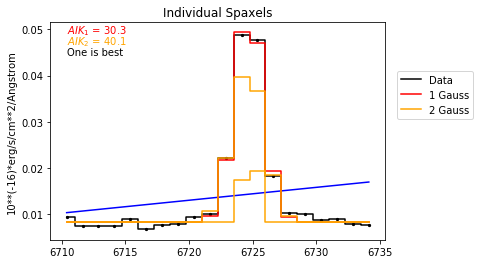

0.0059130415
(20,) (20,)
[ 1.81388527e-04 -1.20686336e+00]
best fit for 1 gauss [3.74238438e-02 6.72449886e+03 1.23901531e+00 7.82764794e-03]


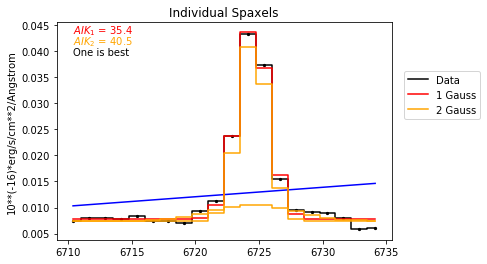

0.007223667
(20,) (20,)
[ 1.73953581e-04 -1.15562731e+00]
best fit for 1 gauss [ 4.56451759e-02  6.72449627e+03 -1.11050429e+00  8.65089744e-03]


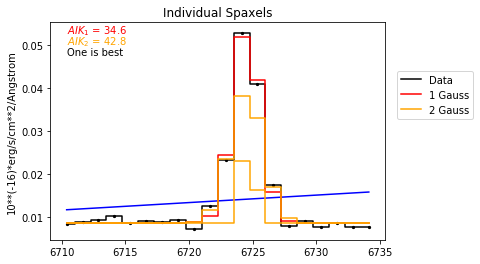

0.0078067267
(20,) (20,)
[ 1.98412798e-04 -1.31927441e+00]
best fit for 1 gauss [ 4.72059613e-02  6.72458211e+03 -1.08198890e+00  9.38610921e-03]


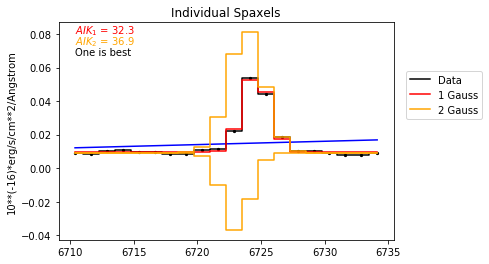

0.008179362
(20,) (20,)
[ 2.53135939e-04 -1.68696331e+00]
best fit for 1 gauss [4.71710342e-02 6.72464199e+03 1.07357750e+00 9.60376752e-03]


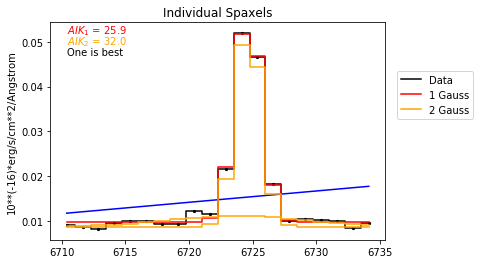

0.008612118
(20,) (20,)
[ 2.30471275e-04 -1.53496551e+00]
best fit for 1 gauss [3.88955182e-02 6.72460530e+03 1.15925041e+00 9.80055633e-03]


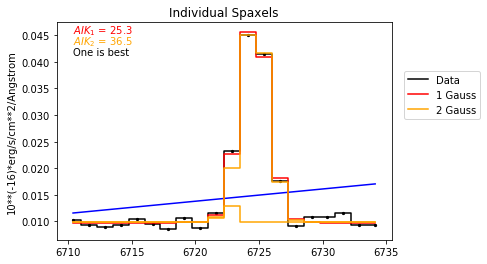

0.00788544
(20,) (20,)
[ 1.21338136e-04 -8.02241966e-01]
best fit for 1 gauss [3.06860494e-02 6.72448639e+03 1.25051308e+00 9.57658122e-03]


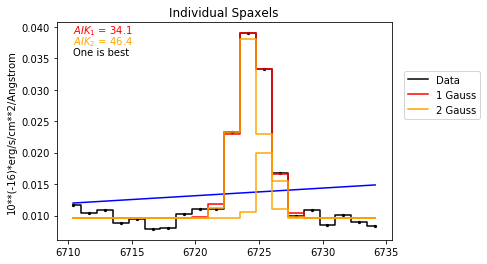

0.0077308253
(20,) (20,)
[ 3.86584715e-05 -2.47177493e-01]
best fit for 1 gauss [2.17140069e-02 6.72439268e+03 1.31048410e+00 9.84153204e-03]


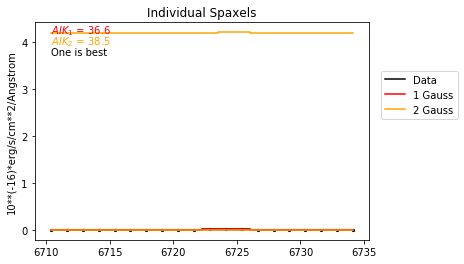

0.008193255
(20,) (20,)
[ 3.54510031e-05 -2.26895967e-01]
best fit for 1 gauss [ 1.49147920e-02  6.72451613e+03 -1.19007633e+00  9.63508363e-03]


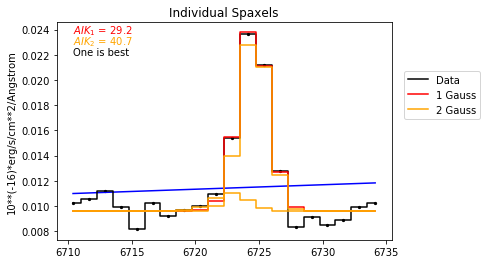

0.0068695396
(20,) (20,)
[-9.91913306e-06  7.73416414e-02]
best fit for 1 gauss [ 1.40320387e-02  6.72449312e+03 -9.93599077e-01  9.26477019e-03]


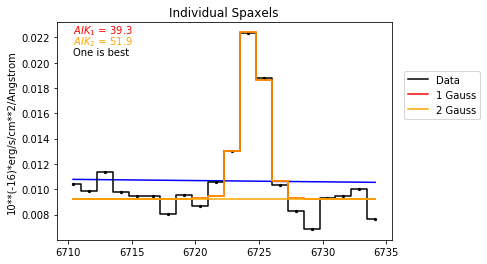

0.0052658278
(20,) (20,)
[-2.89764919e-05  2.04271521e-01]
best fit for 1 gauss [8.41844771e-03 6.72455373e+03 1.52605801e+00 8.19600433e-03]


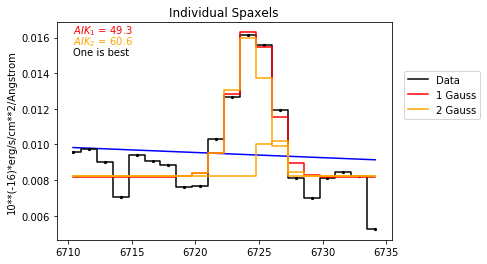

0.005574552
(20,) (20,)
[ 3.98714322e-05 -2.59464082e-01]
best fit for 1 gauss [8.91042869e-03 6.72439384e+03 1.61913229e+00 7.11536536e-03]


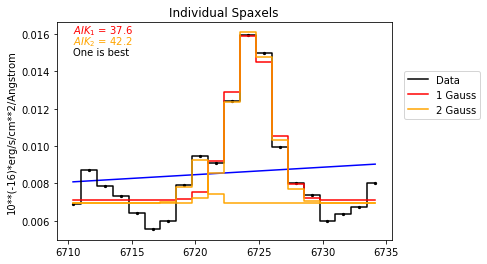

0.0058374084
(20,) (20,)
[ 4.93558170e-05 -3.22855346e-01]
best fit for 1 gauss [7.11431074e-03 6.72441976e+03 1.58910036e+00 7.79357541e-03]


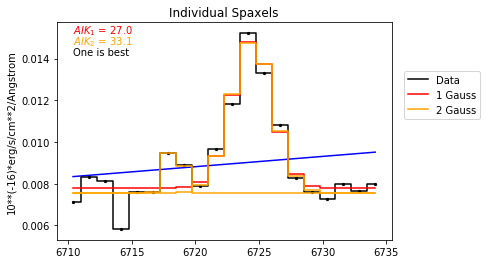

0.004872185
(20,) (20,)
[ 5.99822676e-05 -3.94794706e-01]
best fit for 1 gauss [6.90351180e-03 6.72403247e+03 1.55011595e+00 7.34851199e-03]


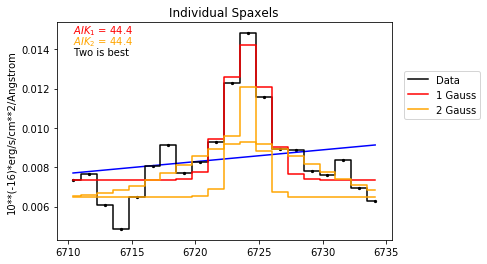

0.00587197
(20,) (20,)
[ 4.66476202e-05 -3.05809441e-01]
best fit for 1 gauss [3.75054373e-03 6.72441145e+03 1.48426129e+00 7.20966511e-03]


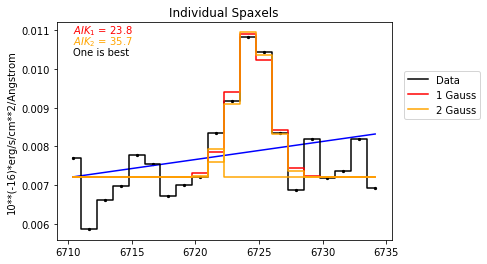

0.0048434907
(20,) (20,)
[ 7.95653771e-06 -4.64199206e-02]
best fit for 1 gauss [2.29060466e-03 6.72376165e+03 3.65336817e+00 6.22799966e-03]


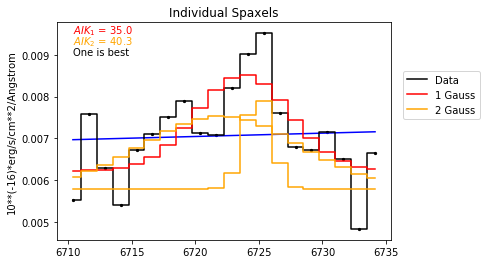

0.0045312233
(20,) (20,)
[ 6.35076365e-05 -4.20400747e-01]
best fit for 1 gauss [3.61379399e-03 6.72416283e+03 1.53570855e+00 5.95742071e-03]


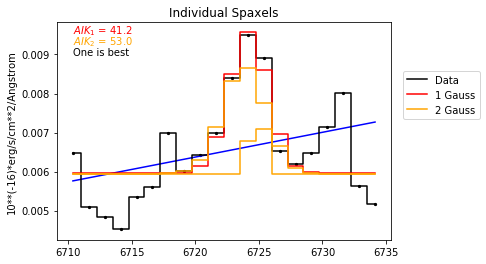

0.0068674986
(20,) (20,)
[ 1.72902942e-04 -1.15084214e+00]
best fit for 1 gauss [2.53548718e-02 6.72477296e+03 1.15538411e+00 8.51853505e-03]


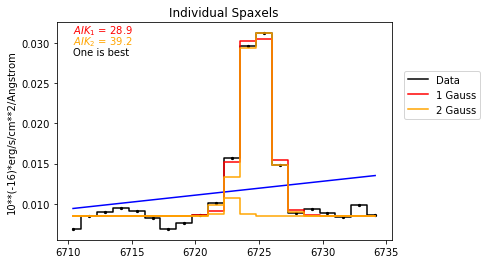

0.006972066
(20,) (20,)
[ 2.25967063e-04 -1.50481643e+00]
best fit for 1 gauss [4.31322449e-02 6.72467661e+03 1.13557986e+00 9.28110120e-03]


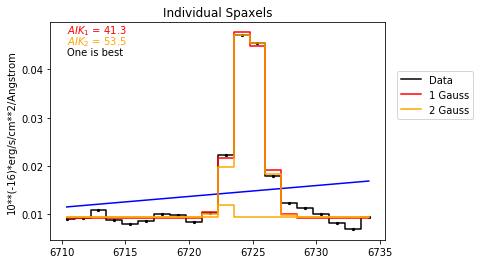

0.007107498
(20,) (20,)
[ 2.47808482e-04 -1.65049090e+00]
best fit for 1 gauss [4.80001910e-02 6.72471632e+03 1.19591743e+00 9.58558903e-03]


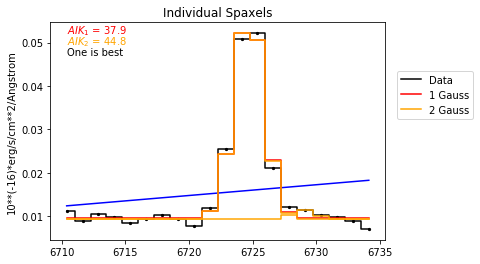

0.0075692562
(20,) (20,)
[ 2.75842354e-04 -1.83794030e+00]
best fit for 1 gauss [ 5.66669076e-02  6.72470835e+03 -1.11524351e+00  1.00062145e-02]


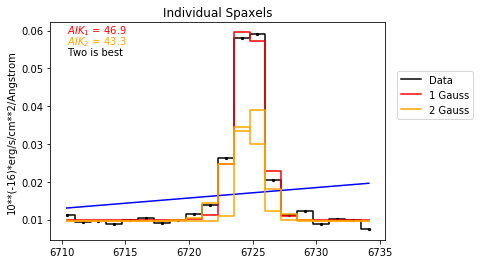

0.00890094
(20,) (20,)
[ 3.27881497e-04 -2.18648723e+00]
best fit for 1 gauss [6.47949047e-02 6.72460927e+03 1.15560990e+00 1.01086351e-02]


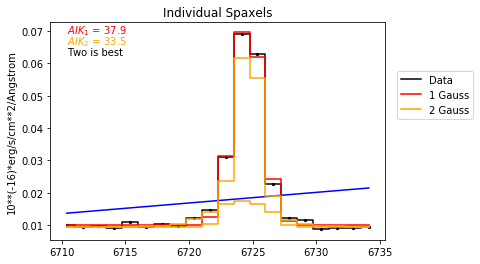

0.008741982
(20,) (20,)
[ 4.54917843e-04 -3.03815622e+00]
best fit for 1 gauss [7.80959073e-02 6.72462733e+03 1.19375177e+00 1.05707050e-02]


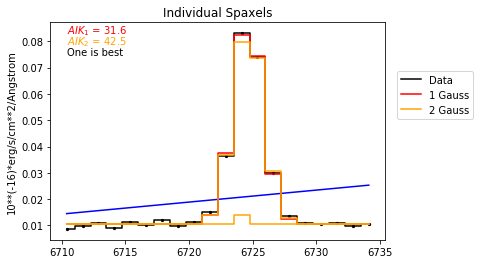

0.009990968
(20,) (20,)
[ 4.83189294e-04 -3.22624008e+00]
best fit for 1 gauss [ 9.38300030e-02  6.72471454e+03 -1.11150648e+00  1.14253000e-02]


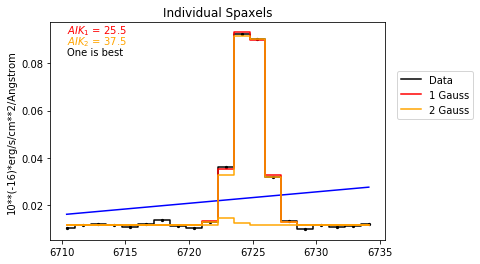

0.0102888765
(20,) (20,)
[ 4.79777512e-04 -3.20330604e+00]
best fit for 1 gauss [ 9.39571330e-02  6.72465266e+03 -1.09075580e+00  1.16057928e-02]


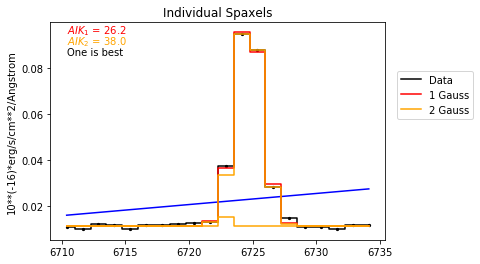

0.009885004
(20,) (20,)
[ 3.91826523e-04 -2.61437350e+00]
best fit for 1 gauss [7.84318718e-02 6.72451352e+03 1.05073964e+00 1.13218410e-02]


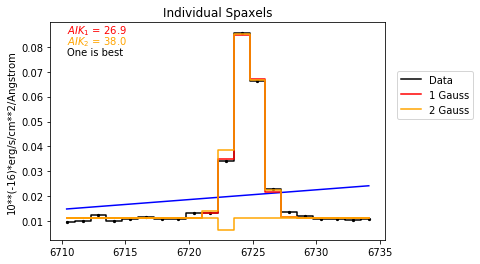

0.009938761
(20,) (20,)
[ 2.12202837e-04 -1.40938671e+00]
best fit for 1 gauss [ 5.13454925e-02  6.72454433e+03 -1.02601332e+00  1.18130868e-02]


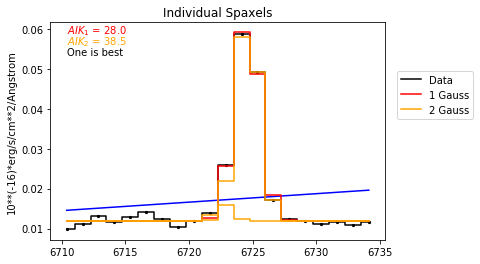

0.009631022
(20,) (20,)
[ 9.71973657e-05 -6.38401350e-01]
best fit for 1 gauss [2.98327250e-02 6.72450248e+03 1.18601283e+00 1.14366782e-02]


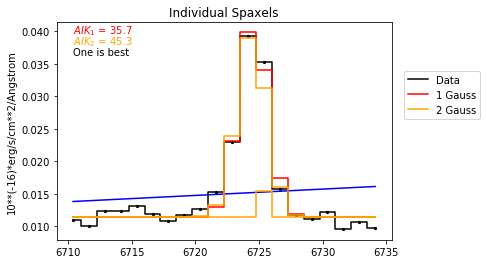

0.009501122
(20,) (20,)
[ 3.43451249e-05 -2.17364673e-01]
best fit for 1 gauss [2.14778133e-02 6.72460189e+03 1.18677077e+00 1.09563789e-02]


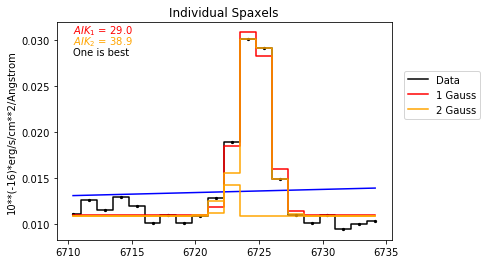

0.00806669
(20,) (20,)
[ 1.30623833e-05 -7.57439273e-02]
best fit for 1 gauss [1.42576893e-02 6.72470118e+03 1.32779077e+00 1.01666198e-02]


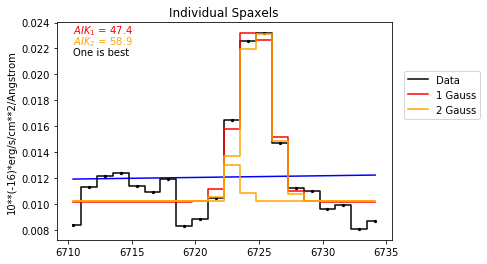

0.0077088657
(20,) (20,)
[-2.32680106e-05  1.67907343e-01]
best fit for 1 gauss [8.97385551e-03 6.72452894e+03 1.35545493e+00 1.02742205e-02]


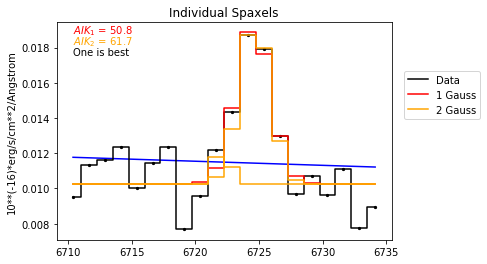

0.007431684
(20,) (20,)
[-3.78323415e-06  3.61611270e-02]
best fit for 1 gauss [8.48788808e-03 6.72454169e+03 1.15961164e+00 9.74238231e-03]


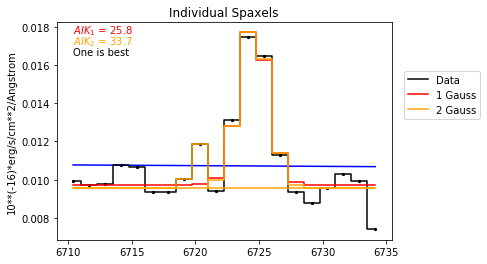

0.007846043
(20,) (20,)
[ 6.32038318e-05 -4.14189362e-01]
best fit for 1 gauss [1.07835949e-02 6.72461063e+03 1.18746021e+00 9.39909289e-03]


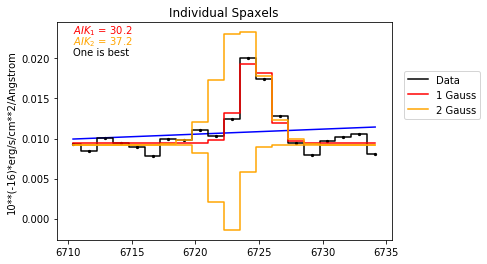

0.00750183
(20,) (20,)
[ 3.46853897e-05 -2.23026961e-01]
best fit for 1 gauss [8.25167430e-03 6.72400508e+03 1.14869584e+00 9.18674071e-03]


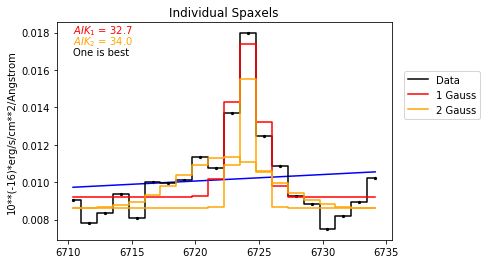

0.006724034
(20,) (20,)
[ 1.59562123e-06 -1.31564819e-03]
best fit for 1 gauss [7.04275590e-03 6.72403970e+03 1.11157742e+00 8.62559407e-03]


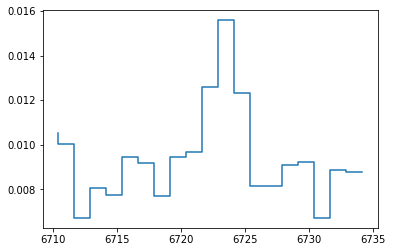

0.0067777303
(20,) (20,)
[ 2.64850161e-05 -1.69554278e-01]
best fit for 1 gauss [3.96487975e-03 6.72344544e+03 1.52132035e+00 7.88000518e-03]


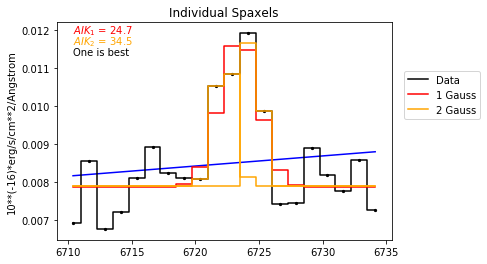

0.0091083525
(20,) (20,)
[ 3.79372189e-04 -2.52829404e+00]
best fit for 1 gauss [ 8.45633514e-02  6.72465351e+03 -1.13087605e+00  1.23546492e-02]


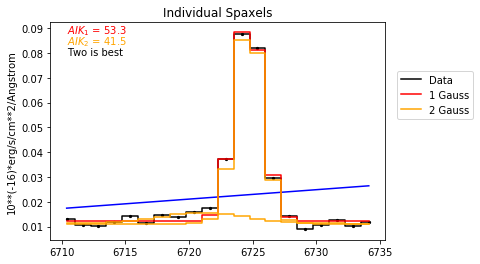

0.010114248
(20,) (20,)
[ 4.97050845e-04 -3.31725195e+00]
best fit for 1 gauss [ 1.03455384e-01  6.72463917e+03 -1.16809800e+00  1.19346123e-02]


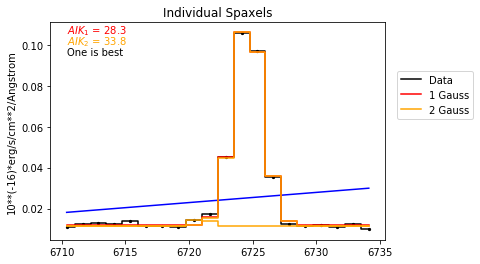

0.010093182
(20,) (20,)
[ 6.09619888e-04 -4.07303842e+00]
best fit for 1 gauss [1.15628052e-01 6.72462527e+03 1.12056208e+00 1.19915473e-02]


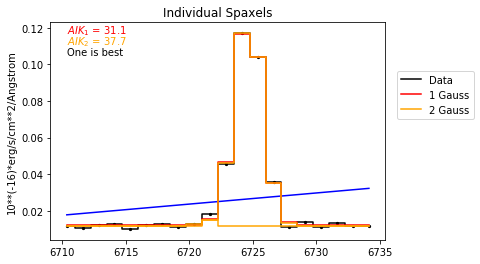

0.009304493
(20,) (20,)
[ 3.81875095e-04 -2.54753669e+00]
best fit for 1 gauss [6.90655191e-02 6.72455101e+03 1.12001910e+00 1.17696114e-02]


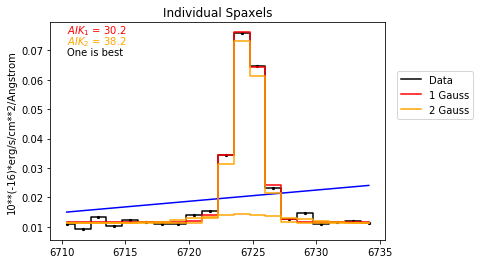

0.009000208
(20,) (20,)
[ 3.21624103e-04 -2.14475482e+00]
best fit for 1 gauss [4.56567050e-02 6.72459439e+03 1.14661823e+00 1.20358874e-02]


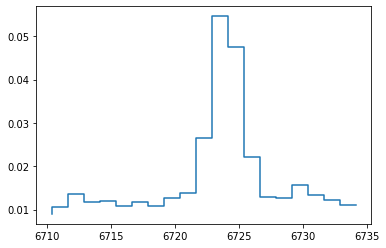

0.011771366
(20,) (20,)
[ 1.61434899e-04 -1.06819801e+00]
best fit for 1 gauss [ 3.37357450e-02  6.72449564e+03 -1.24724498e+00  1.27899376e-02]


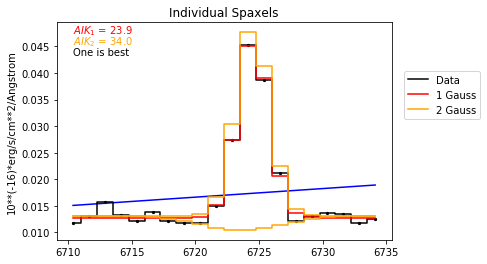

0.008615735
(20,) (20,)
[ 9.47300021e-05 -6.22341123e-01]
best fit for 1 gauss [2.15433631e-02 6.72463351e+03 1.41439521e+00 1.14030733e-02]


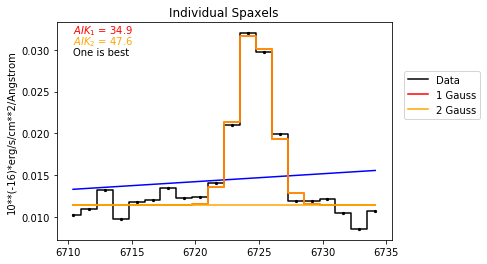

0.00893197
(20,) (20,)
[ 6.13445745e-05 -3.98936770e-01]
best fit for 1 gauss [1.62769818e-02 6.72474646e+03 1.31743849e+00 1.12871072e-02]


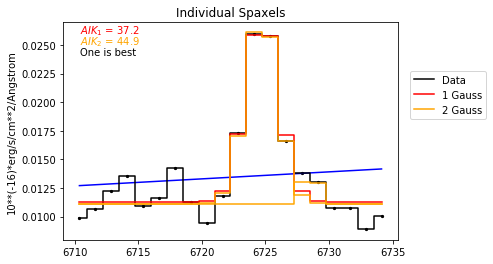

0.009099767
(20,) (20,)
[ 6.10297952e-05 -3.98355999e-01]
best fit for 1 gauss [1.17777799e-02 6.72450305e+03 1.23450076e+00 1.04441066e-02]


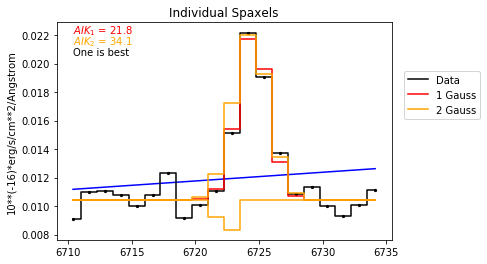

0.009088405
(20,) (20,)
[ 2.83478102e-05 -1.79964739e-01]
best fit for 1 gauss [6.08319642e-03 6.72361485e+03 1.26176257e+00 9.82691828e-03]


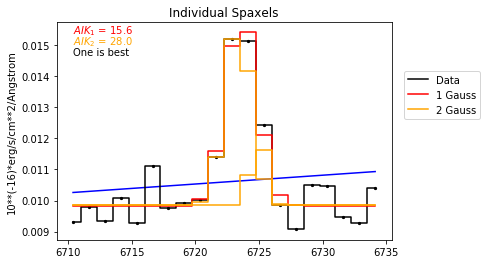

0.0072625917
(20,) (20,)
[ 6.98355409e-05 -4.58776463e-01]
best fit for 1 gauss [1.15615812e-02 6.72448953e+03 1.46810864e+00 8.97407923e-03]


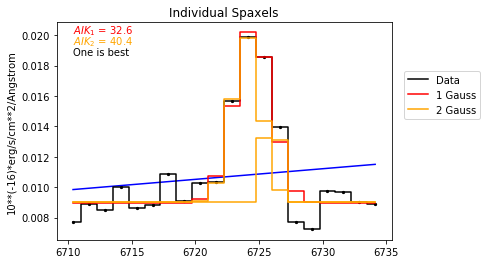

0.006411157
(20,) (20,)
[ 6.58059863e-05 -4.32299110e-01]
best fit for 1 gauss [1.30917654e-02 6.72477353e+03 1.35892612e+00 8.28180834e-03]


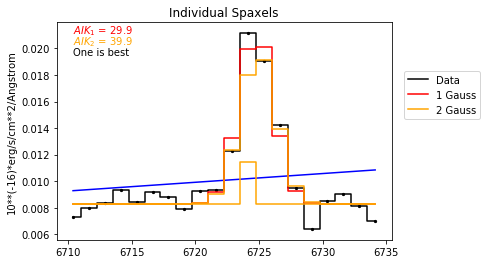

0.0082958825
(20,) (20,)
[ 1.06859918e-04 -7.04752102e-01]
best fit for 1 gauss [2.87368996e-02 6.72462827e+03 1.23201990e+00 1.00378275e-02]


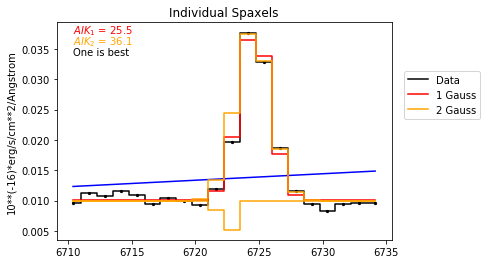

0.008699785
(20,) (20,)
[ 2.78142230e-04 -1.85271964e+00]
best fit for 1 gauss [5.77957244e-02 6.72461585e+03 1.18053450e+00 1.01826593e-02]


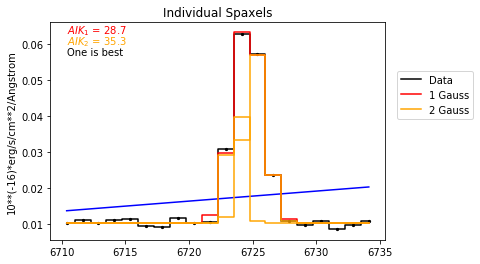

0.00961177
(20,) (20,)
[ 4.00393806e-04 -2.67226573e+00]
best fit for 1 gauss [7.13098245e-02 6.72465092e+03 1.15419686e+00 1.10316930e-02]


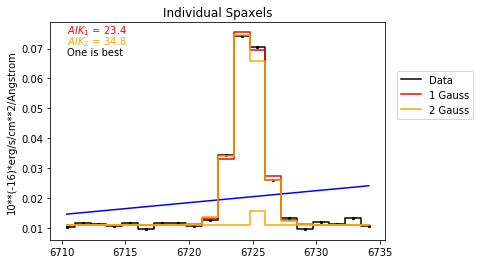

0.010807297
(20,) (20,)
[ 4.48511442e-04 -2.99198251e+00]
best fit for 1 gauss [ 8.93027021e-02  6.72463341e+03 -1.15999809e+00  1.26398146e-02]


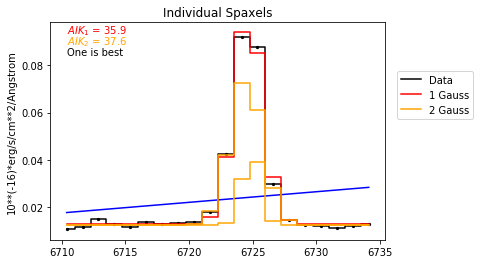

0.011896751
(20,) (20,)
[ 6.46302791e-04 -4.31691064e+00]
best fit for 1 gauss [ 1.16049305e-01  6.72451943e+03 -1.21096996e+00  1.36119226e-02]


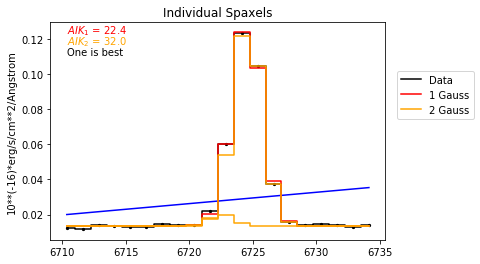

0.011911633
(20,) (20,)
[ 6.02575609e-04 -4.02258175e+00]
best fit for 1 gauss [1.17198396e-01 6.72448469e+03 1.22011561e+00 1.37484923e-02]


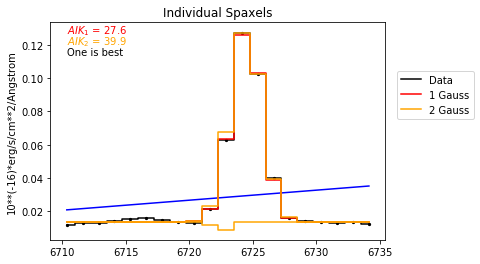

0.011949805
(20,) (20,)
[ 5.09311676e-04 -3.39694522e+00]
best fit for 1 gauss [1.05659690e-01 6.72447557e+03 1.20084604e+00 1.40566909e-02]


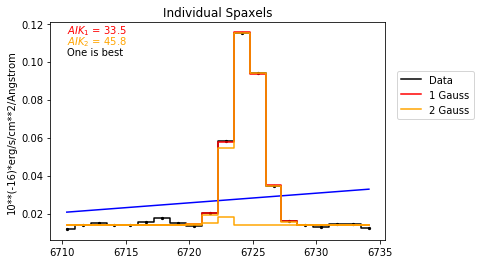

0.01154389
(20,) (20,)
[ 3.77581999e-04 -2.51526540e+00]
best fit for 1 gauss [8.03496116e-02 6.72447040e+03 1.16123668e+00 1.35823560e-02]


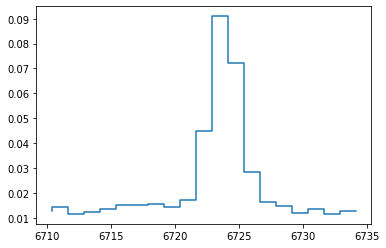

0.0109972935
(20,) (20,)
[ 3.80172777e-04 -2.53522096e+00]
best fit for 1 gauss [5.86678111e-02 6.72448103e+03 1.21111420e+00 1.32737245e-02]


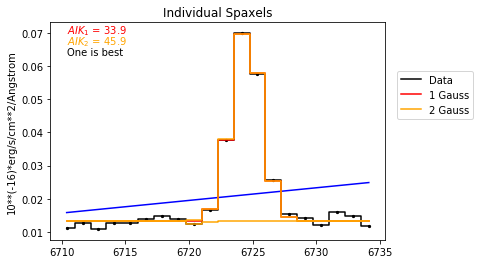

0.009605625
(20,) (20,)
[ 3.05169000e-04 -2.03393968e+00]
best fit for 1 gauss [4.21898235e-02 6.72456872e+03 1.21856179e+00 1.23298414e-02]


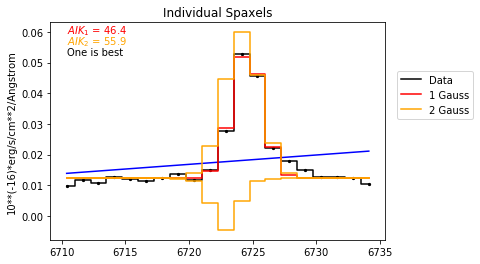

0.011601815
(20,) (20,)
[ 1.89537624e-04 -1.25698726e+00]
best fit for 1 gauss [ 3.14666263e-02  6.72473286e+03 -1.38511949e+00  1.27631730e-02]


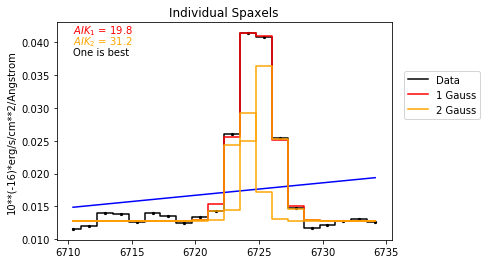

0.0088763125
(20,) (20,)
[ 6.66278087e-05 -4.32622673e-01]
best fit for 1 gauss [2.35405330e-02 6.72449480e+03 1.49866597e+00 1.17292432e-02]


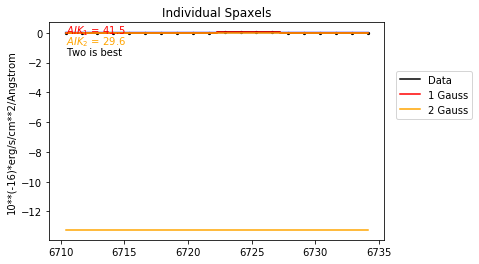

0.009112512
(20,) (20,)
[ 7.96609634e-05 -5.21705746e-01]
best fit for 1 gauss [1.69043860e-02 6.72439666e+03 1.12200715e+00 1.18939582e-02]


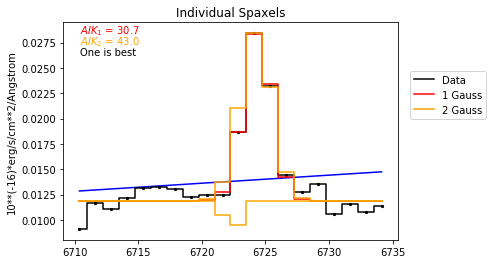

0.008089435
(20,) (20,)
[ 9.14731123e-05 -6.02485540e-01]
best fit for 1 gauss [1.33957935e-02 6.72430178e+03 1.24957914e+00 1.07418215e-02]


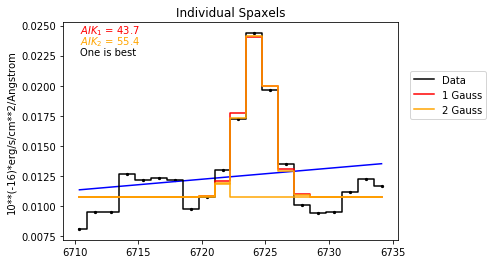

0.008138625
(20,) (20,)
[-3.21079382e-07  1.26639543e-02]
best fit for 1 gauss [6.12156205e-03 6.72413425e+03 1.30550641e+00 9.70428372e-03]


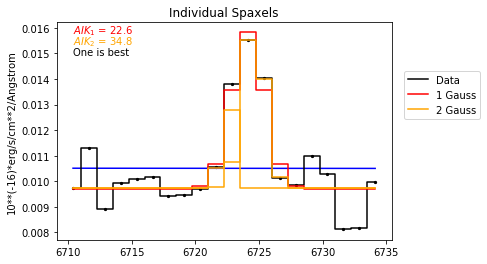

0.0066244523
(20,) (20,)
[ 3.69756123e-05 -2.38286018e-01]
best fit for 1 gauss [4.65972600e-03 6.72376081e+03 6.02929417e+00 7.58008023e-03]


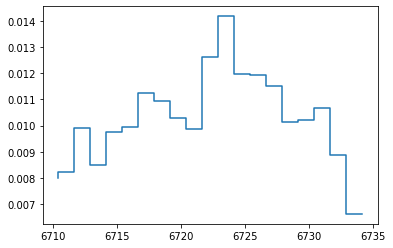

0.009606412
(20,) (20,)
[ 6.49396271e-04 -4.33814230e+00]
best fit for 1 gauss [1.28458039e-01 6.72471005e+03 1.08424402e+00 1.33010023e-02]


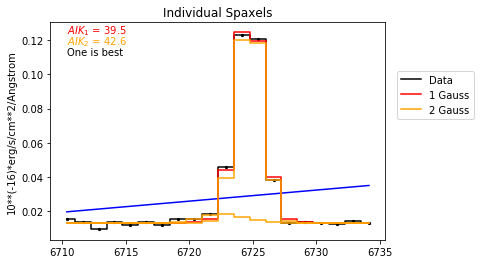

0.0136530455
(20,) (20,)
[ 7.31054129e-04 -4.88208757e+00]
best fit for 1 gauss [ 1.51902921e-01  6.72461597e+03 -1.10115172e+00  1.54745321e-02]


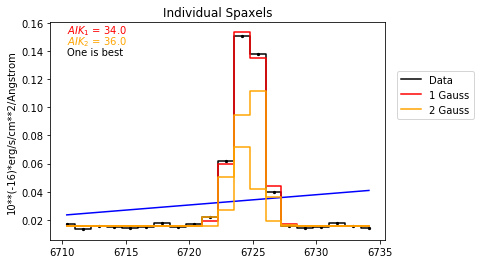

0.013366055
(20,) (20,)
[ 7.95515437e-04 -5.31294854e+00]
best fit for 1 gauss [1.57001959e-01 6.72453065e+03 1.16239398e+00 1.64119522e-02]


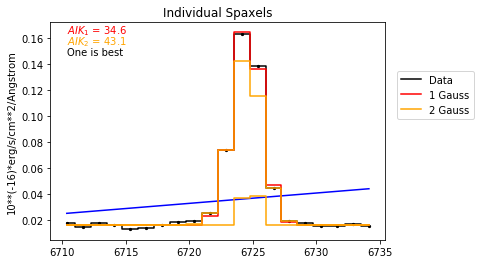

0.013159139
(20,) (20,)
[ 7.25335483e-04 -4.84390262e+00]
best fit for 1 gauss [1.31141702e-01 6.72446783e+03 1.20150167e+00 1.61899608e-02]


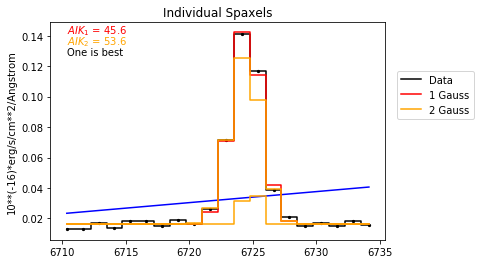

0.013320961
(20,) (20,)
[ 4.36374953e-04 -2.90704884e+00]
best fit for 1 gauss [8.87344307e-02 6.72440864e+03 1.20792569e+00 1.56285792e-02]


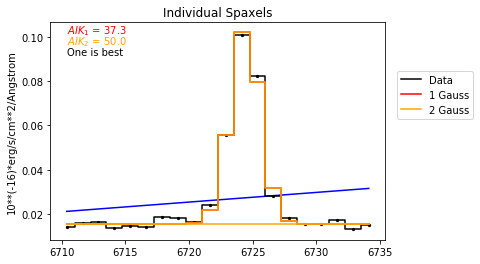

0.013225905
(20,) (20,)
[ 3.40637789e-04 -2.26672379e+00]
best fit for 1 gauss [6.22681677e-02 6.72432180e+03 1.22849537e+00 1.54608472e-02]


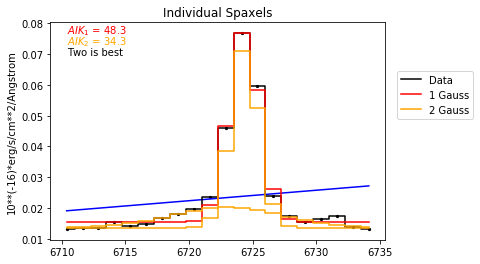

0.013169716
(20,) (20,)
[ 1.81842947e-04 -1.20211985e+00]
best fit for 1 gauss [4.39244781e-02 6.72441638e+03 1.22924341e+00 1.48613577e-02]


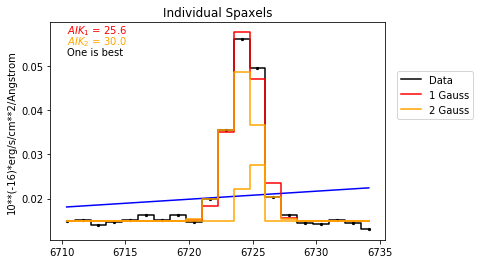

0.012302612
(20,) (20,)
[ 2.13680565e-04 -1.41844639e+00]
best fit for 1 gauss [2.96090001e-02 6.72458762e+03 1.28199170e+00 1.41632292e-02]


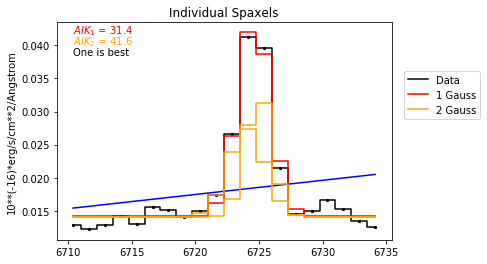

0.011469072
(20,) (20,)
[ 1.44263122e-04 -9.54243373e-01]
best fit for 1 gauss [2.12656215e-02 6.72451145e+03 1.27680456e+00 1.28079145e-02]


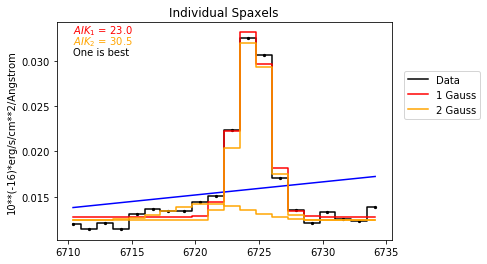

0.009947499
(20,) (20,)
[ 1.18143890e-04 -7.79431439e-01]
best fit for 1 gauss [1.78013581e-02 6.72471918e+03 1.31741119e+00 1.24106881e-02]


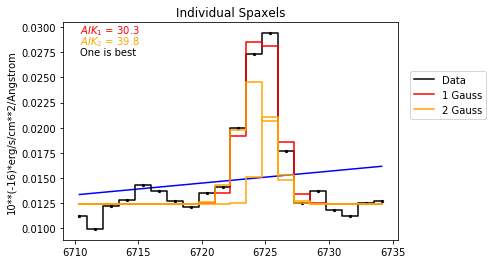

0.0096633965
(20,) (20,)
[ 4.97895812e-05 -3.21011981e-01]
best fit for 1 gauss [1.31843976e-02 6.72442945e+03 1.23453622e+00 1.20543697e-02]


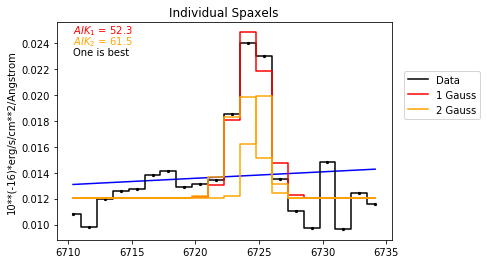

0.008551853
(20,) (20,)
[ 1.15695832e-05 -6.57526064e-02]
best fit for 1 gauss [1.15606774e-02 6.72447850e+03 1.19028130e+00 1.06414032e-02]


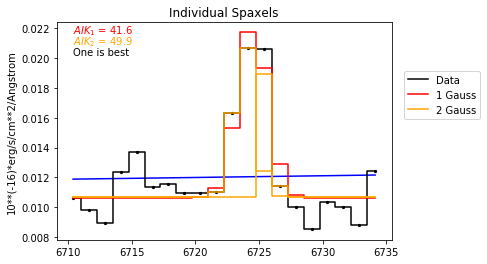

0.008057151
(20,) (20,)
[ 3.43178522e-05 -2.20150767e-01]
best fit for 1 gauss [9.10536972e-03 6.72475086e+03 1.08638679e+00 9.55081474e-03]


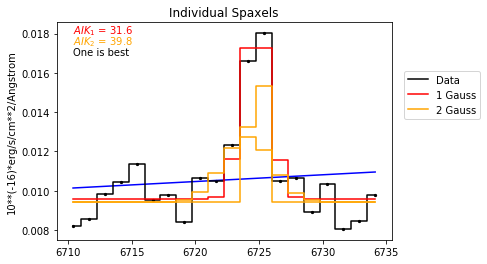

0.0064328397
(20,) (20,)
[ 7.57532517e-05 -4.99560564e-01]
best fit for 1 gauss [4.15142267e-03 6.72432907e+03 4.64236823e+00 7.76488867e-03]


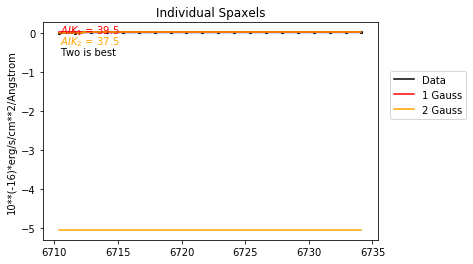

0.006262104
(20,) (20,)
[ 4.37619292e-05 -2.86139222e-01]
best fit for 1 gauss [4.39184818e-03 6.72444720e+03 2.22456098e+00 7.06010205e-03]


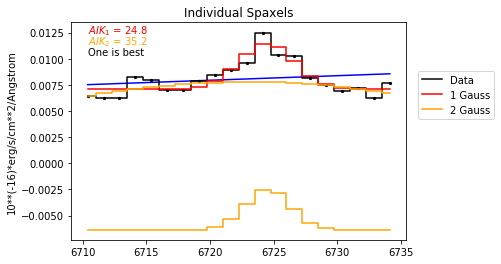

0.0065892716
(20,) (20,)
[ 1.76758878e-04 -1.17776247e+00]
best fit for 1 gauss [1.80140465e-02 6.72508265e+03 1.56566408e+00 7.62814480e-03]


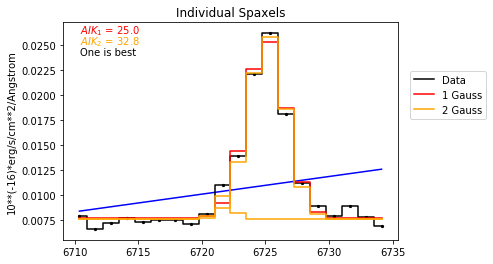

0.0067560235
(20,) (20,)
[ 1.66572030e-04 -1.10884419e+00]
best fit for 1 gauss [ 1.61383281e-02  6.72506082e+03 -1.38987640e+00  8.64671728e-03]


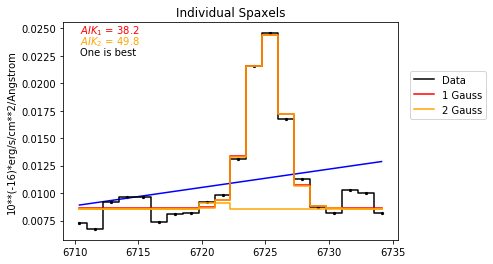

0.006998306
(20,) (20,)
[ 1.18254185e-04 -7.83389412e-01]
best fit for 1 gauss [2.01648099e-02 6.72495067e+03 1.43281312e+00 8.64863400e-03]


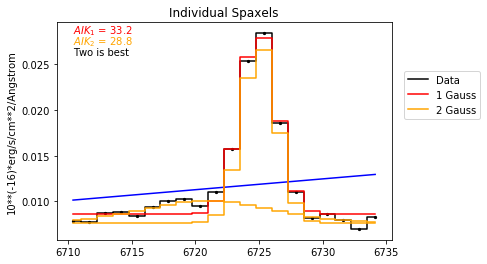

0.00713494
(20,) (20,)
[ 4.96219629e-05 -3.21975932e-01]
best fit for 1 gauss [2.07755871e-02 6.72482306e+03 1.32604189e+00 8.83338942e-03]


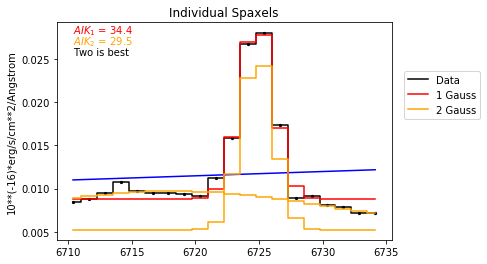

0.0066957185
(20,) (20,)
[ 1.11355403e-04 -7.37324214e-01]
best fit for 1 gauss [2.29163078e-02 6.72489830e+03 1.32493209e+00 8.19104636e-03]


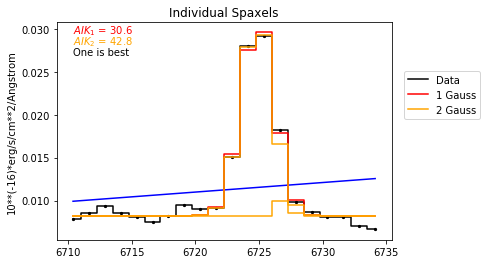

0.0068647987
(20,) (20,)
[ 1.96262932e-04 -1.30717021e+00]
best fit for 1 gauss [2.80375763e-02 6.72496265e+03 1.34508805e+00 8.37823178e-03]


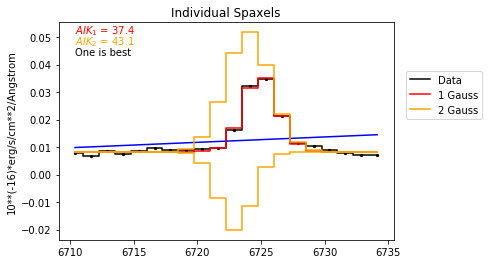

0.0075953235
(20,) (20,)
[ 1.60896837e-04 -1.06742666e+00]
best fit for 1 gauss [ 3.80801842e-02  6.72477540e+03 -1.23773099e+00  9.43732931e-03]


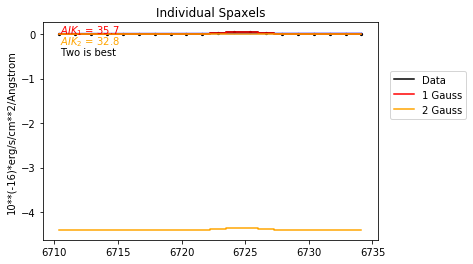

0.008556288
(20,) (20,)
[ 2.01197016e-04 -1.33619545e+00]
best fit for 1 gauss [ 4.67057068e-02  6.72469543e+03 -1.23750840e+00  1.05072782e-02]


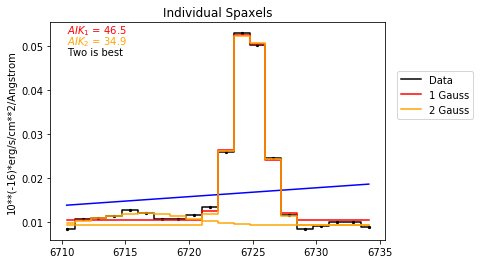

0.008951315
(20,) (20,)
[ 2.21488869e-04 -1.47015493e+00]
best fit for 1 gauss [ 6.04798777e-02  6.72469760e+03 -1.18737557e+00  1.15497545e-02]


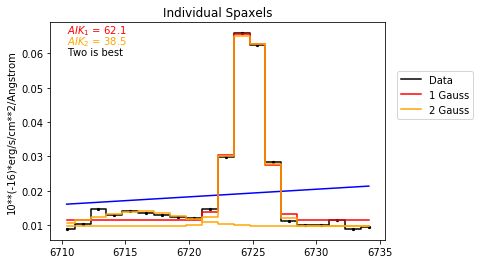

0.010439146
(20,) (20,)
[ 4.36798777e-04 -2.91267404e+00]
best fit for 1 gauss [ 8.39019025e-02  6.72464382e+03 -1.26235775e+00  1.29798080e-02]


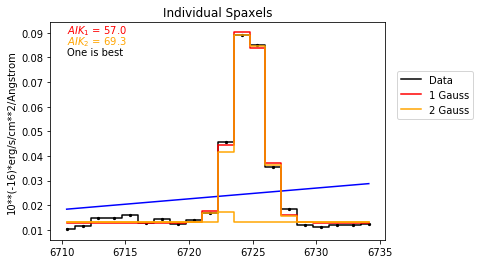

0.011119955
(20,) (20,)
[ 6.30474301e-04 -4.21010168e+00]
best fit for 1 gauss [ 1.17622547e-01  6.72465118e+03 -1.24080011e+00  1.34748878e-02]


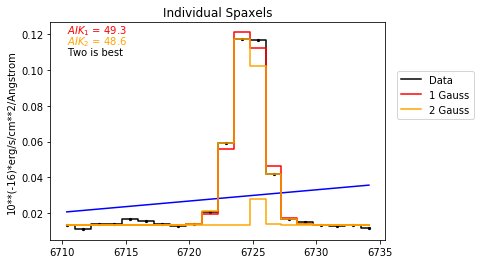

0.012817693
(20,) (20,)
[ 8.97124910e-04 -5.99641858e+00]
best fit for 1 gauss [1.54467419e-01 6.72458407e+03 1.25506003e+00 1.48470549e-02]


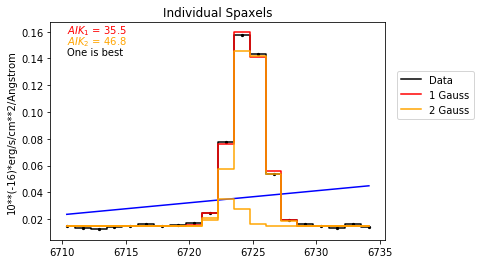

0.014031915
(20,) (20,)
[ 1.02590281e-03 -6.85598522e+00]
best fit for 1 gauss [1.88680798e-01 6.72442026e+03 1.26082097e+00 1.65440887e-02]


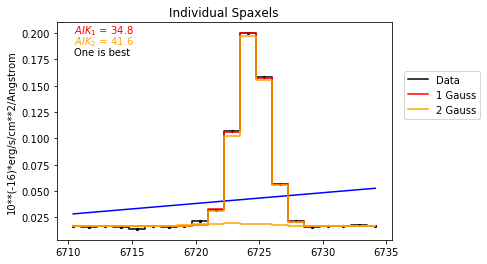

0.015209075
(20,) (20,)
[ 9.78728407e-04 -6.53728843e+00]
best fit for 1 gauss [1.91465258e-01 6.72433018e+03 1.26574414e+00 1.76759600e-02]


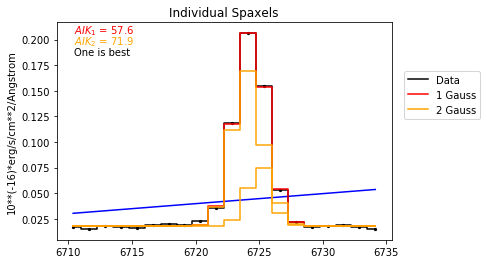

0.014862599
(20,) (20,)
[ 8.17405264e-04 -5.45619094e+00]
best fit for 1 gauss [1.57895517e-01 6.72429154e+03 1.29886842e+00 1.80538583e-02]


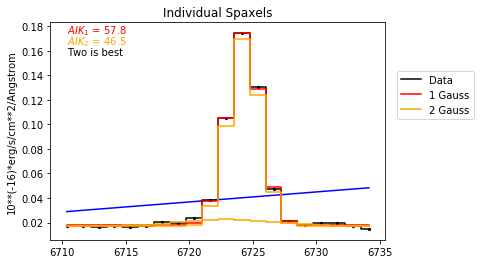

0.016472619
(20,) (20,)
[ 5.62354307e-04 -3.74850033e+00]
best fit for 1 gauss [ 1.10839251e-01  6.72428663e+03 -1.27749122e+00  1.75923224e-02]


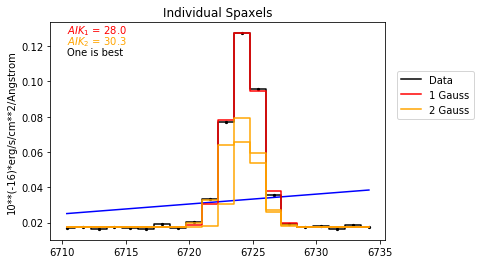

0.015143539
(20,) (20,)
[ 3.24105540e-04 -2.15276365e+00]
best fit for 1 gauss [7.02020384e-02 6.72426713e+03 1.20390011e+00 1.74828458e-02]


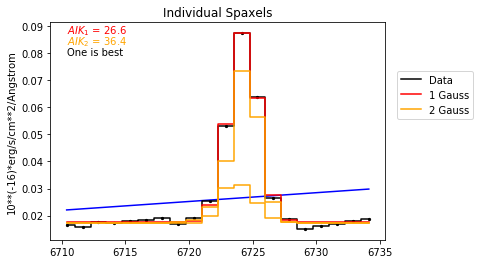

0.013044334
(20,) (20,)
[ 1.80712944e-04 -1.19294752e+00]
best fit for 1 gauss [ 4.71637941e-02  6.72443560e+03 -1.20563711e+00  1.61498946e-02]


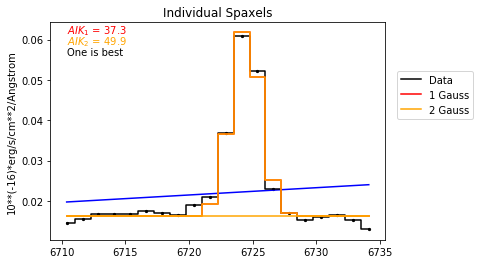

0.010664457
(20,) (20,)
[ 1.00137478e-04 -6.54718639e-01]
best fit for 1 gauss [2.86730849e-02 6.72439818e+03 1.48331575e+00 1.41667575e-02]


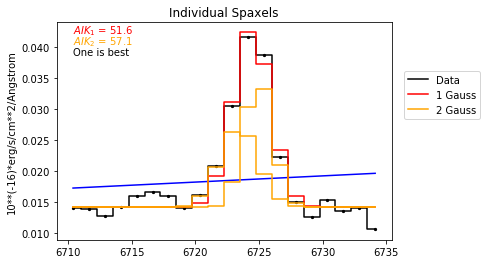

0.011176549
(20,) (20,)
[ 1.24579922e-04 -8.21667202e-01]
best fit for 1 gauss [2.25385849e-02 6.72451877e+03 1.33149147e+00 1.27820166e-02]


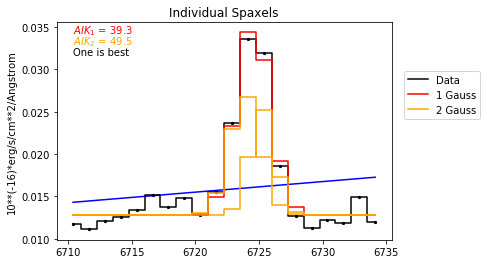

0.009610243
(20,) (20,)
[ 7.84451287e-05 -5.12560933e-01]
best fit for 1 gauss [2.01477306e-02 6.72461079e+03 1.08897911e+00 1.25674695e-02]


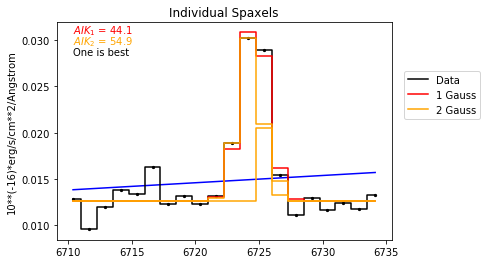

0.0095624775
(20,) (20,)
[ 4.19875377e-05 -2.68871365e-01]
best fit for 1 gauss [1.48074854e-02 6.72443235e+03 1.15672829e+00 1.16622619e-02]


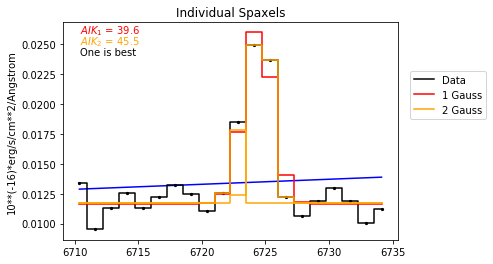

0.008212492
(20,) (20,)
[ 2.58392072e-05 -1.61571213e-01]
best fit for 1 gauss [1.18841695e-02 6.72419715e+03 1.19807724e+00 1.06989717e-02]


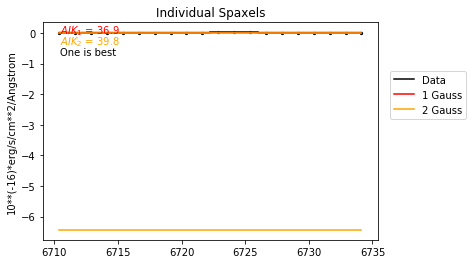

0.006642852
(20,) (20,)
[ 2.21842463e-05 -1.38160486e-01]
best fit for 1 gauss [8.82903679e-03 6.72448738e+03 1.35262428e+00 9.77030094e-03]


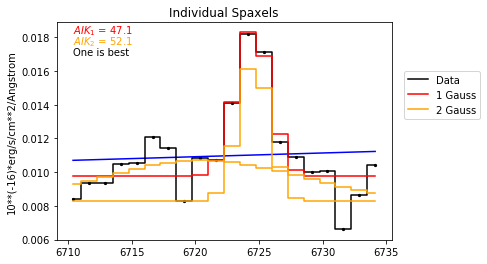

0.0069370237
(20,) (20,)
[ 4.57916027e-05 -2.98401287e-01]
best fit for 1 gauss [6.23169319e-03 6.72421226e+03 1.41681284e+00 8.53634979e-03]


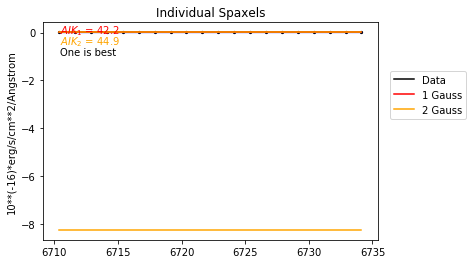

0.0069846227
(20,) (20,)
[ 7.73509388e-05 -5.11144827e-01]
best fit for 1 gauss [5.55543948e-03 6.72448234e+03 1.31079673e+00 8.09787641e-03]


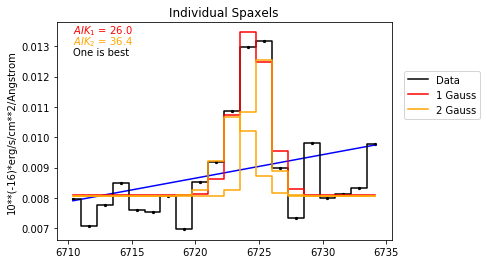

0.006655347
(20,) (20,)
[ 1.29328493e-04 -8.56740659e-01]
best fit for 1 gauss [2.73800034e-02 6.72516800e+03 1.33774807e+00 8.96615849e-03]


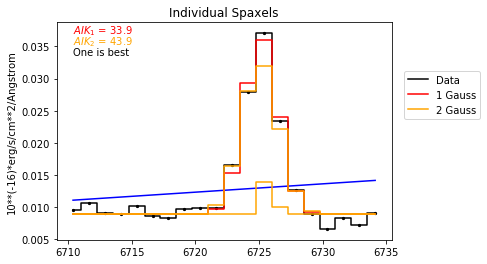

0.0077528157
(20,) (20,)
[ 2.37290733e-04 -1.57972772e+00]
best fit for 1 gauss [4.33061973e-02 6.72490080e+03 1.19640683e+00 1.02064912e-02]


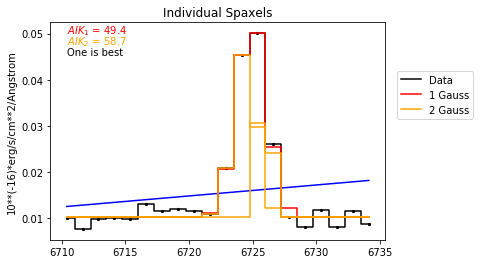

0.008574661
(20,) (20,)
[ 2.23315256e-04 -1.48234891e+00]
best fit for 1 gauss [5.41751304e-02 6.72465688e+03 1.24367188e+00 1.20780173e-02]


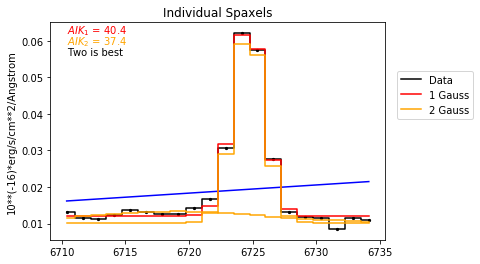

0.009868554
(20,) (20,)
[ 2.85364794e-04 -1.89628974e+00]
best fit for 1 gauss [ 6.38138963e-02  6.72478990e+03 -1.31209883e+00  1.36103436e-02]


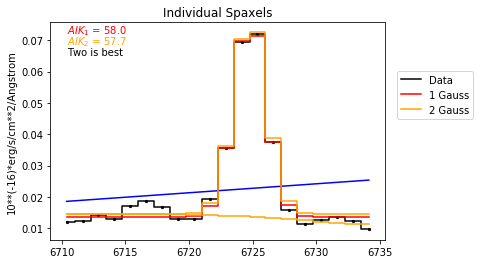

0.012785326
(20,) (20,)
[ 4.68043010e-04 -3.12017338e+00]
best fit for 1 gauss [9.15075208e-02 6.72466140e+03 1.20301325e+00 1.50940467e-02]


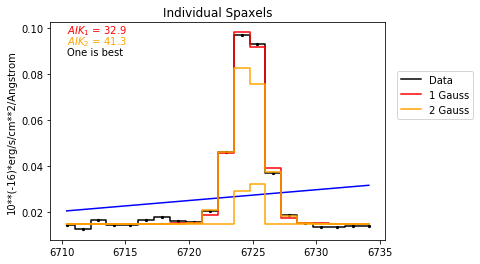

0.012621301
(20,) (20,)
[ 6.81203537e-04 -4.54692188e+00]
best fit for 1 gauss [ 1.35787947e-01  6.72467937e+03 -1.20456355e+00  1.59030374e-02]


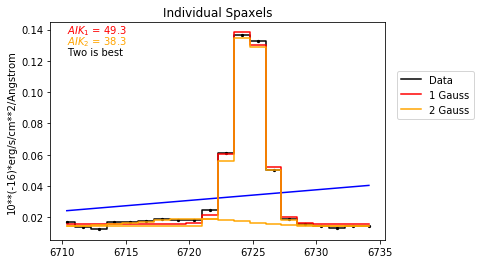

0.012741778
(20,) (20,)
[ 1.07846497e-03 -7.20922548e+00]
best fit for 1 gauss [1.92137228e-01 6.72460068e+03 1.27501596e+00 1.59297491e-02]


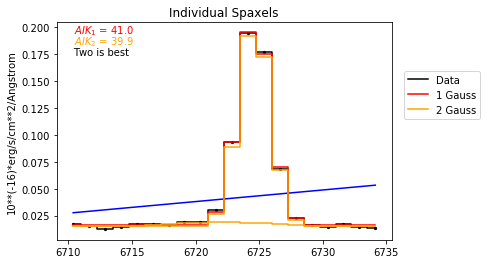

0.013152857
(20,) (20,)
[ 1.35220565e-03 -9.04151486e+00]
best fit for 1 gauss [2.49720424e-01 6.72444845e+03 1.26018207e+00 1.68053803e-02]


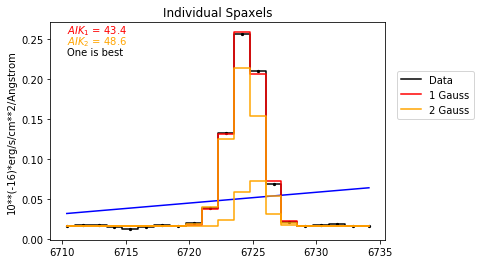

0.01657575
(20,) (20,)
[ 1.37160707e-03 -9.16846309e+00]
best fit for 1 gauss [2.63914081e-01 6.72435673e+03 1.25667063e+00 1.85779921e-02]


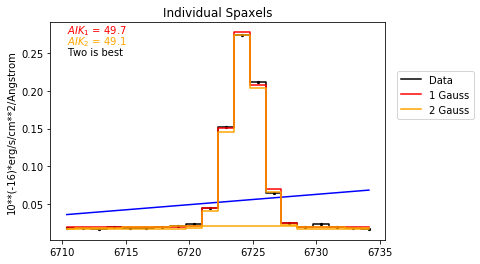

0.01640256
(20,) (20,)
[ 1.08245122e-03 -7.23048038e+00]
best fit for 1 gauss [2.10770263e-01 6.72434641e+03 1.25572740e+00 1.94970567e-02]


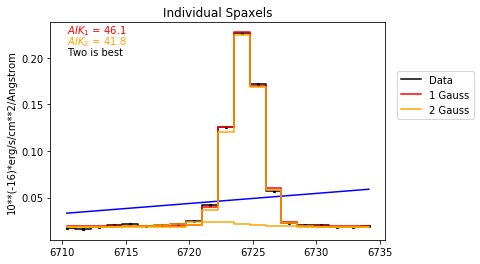

0.015782408
(20,) (20,)
[ 6.15353599e-04 -4.10195861e+00]
best fit for 1 gauss [1.30982617e-01 6.72425094e+03 1.21899480e+00 1.85969871e-02]


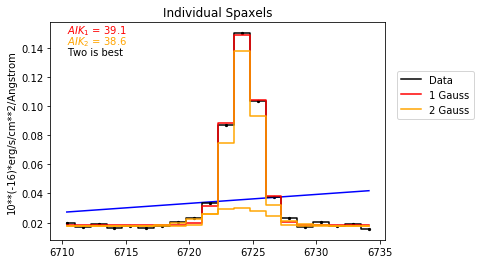

0.014729502
(20,) (20,)
[ 3.37650221e-04 -2.24177168e+00]
best fit for 1 gauss [ 7.70211078e-02  6.72426936e+03 -1.28097001e+00  1.81073283e-02]


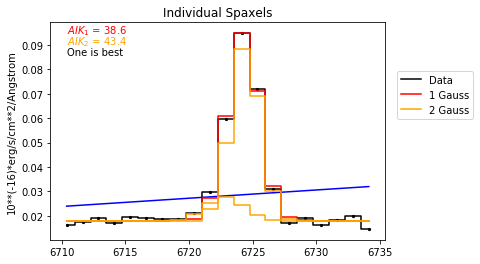

0.013328749
(20,) (20,)
[ 1.92182370e-04 -1.26927208e+00]
best fit for 1 gauss [4.55070490e-02 6.72429472e+03 1.38113574e+00 1.63252686e-02]


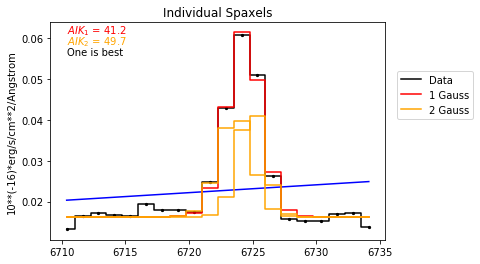

0.012277914
(20,) (20,)
[ 1.29912164e-04 -8.55378083e-01]
best fit for 1 gauss [2.83181025e-02 6.72426897e+03 1.38516953e+00 1.39918502e-02]


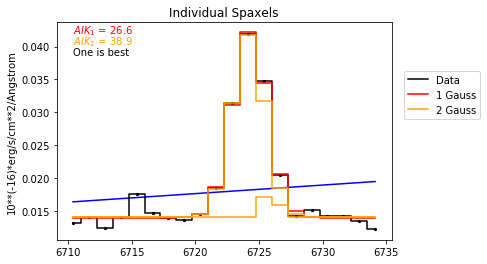

0.011552614
(20,) (20,)
[ 1.20159067e-04 -7.91841136e-01]
best fit for 1 gauss [2.41495555e-02 6.72446614e+03 1.25459200e+00 1.28611015e-02]


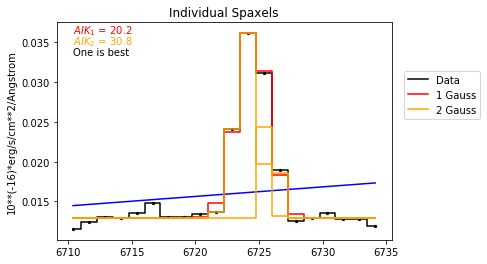

0.010179442
(20,) (20,)
[ 6.36904696e-05 -4.13586071e-01]
best fit for 1 gauss [1.78052191e-02 6.72436846e+03 1.25634693e+00 1.23147077e-02]


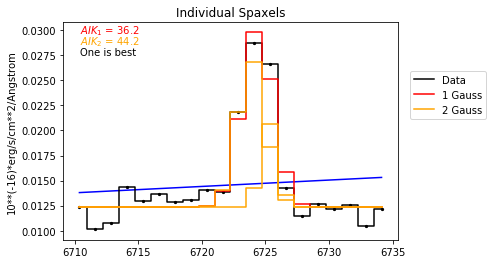

0.009428064
(20,) (20,)
[ 1.62507371e-05 -9.58740043e-02]
best fit for 1 gauss [1.53947073e-02 6.72422764e+03 1.11138557e+00 1.16521339e-02]


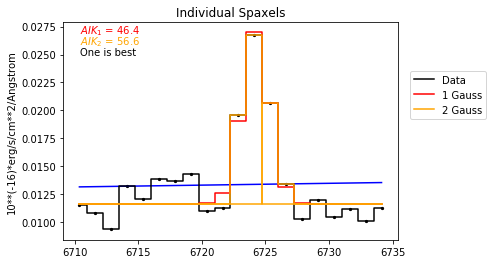

0.009068949
(20,) (20,)
[ 8.93132812e-05 -5.87862376e-01]
best fit for 1 gauss [1.23695365e-02 6.72419043e+03 1.35885361e+00 1.08391002e-02]


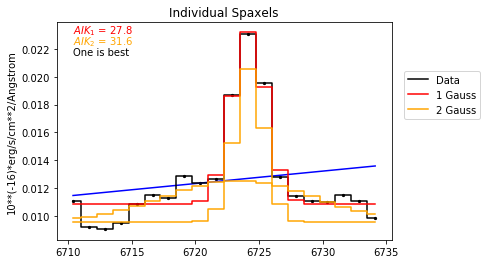

0.008403357
(20,) (20,)
[ 6.16223645e-05 -4.03082981e-01]
best fit for 1 gauss [9.11177077e-03 6.72444128e+03 1.44363528e+00 9.83945448e-03]


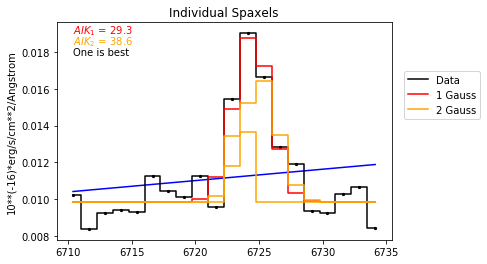

0.0073315357
(20,) (20,)
[ 5.97470175e-05 -3.91675155e-01]
best fit for 1 gauss [7.76033651e-03 6.72435319e+03 9.57953412e-01 9.21423126e-03]


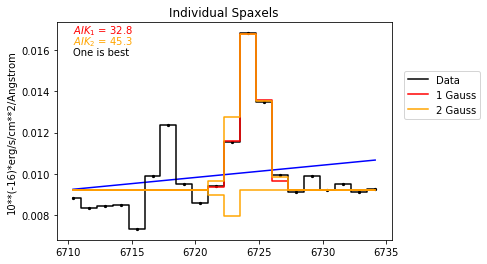

0.00709105
(20,) (20,)
[ 6.57985926e-05 -4.33123300e-01]
best fit for 1 gauss [6.25994918e-03 6.72400411e+03 1.44930819e+00 8.28204190e-03]


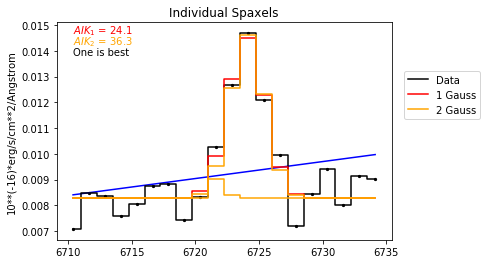

0.0060229315
(20,) (20,)
[ 1.39035704e-05 -8.54591892e-02]
best fit for 1 gauss [4.37952620e-03 6.72448200e+03 1.69828873e+00 7.25843309e-03]


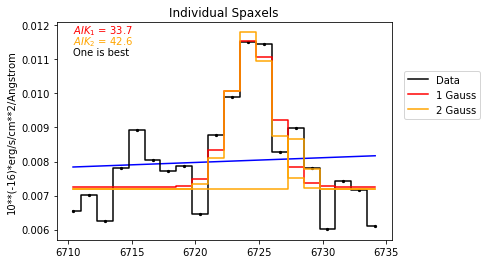

0.0047871685
(20,) (20,)
[ 1.20178767e-04 -7.99231750e-01]
best fit for 1 gauss [1.11338113e-02 6.72513087e+03 1.43657807e+00 7.03703184e-03]


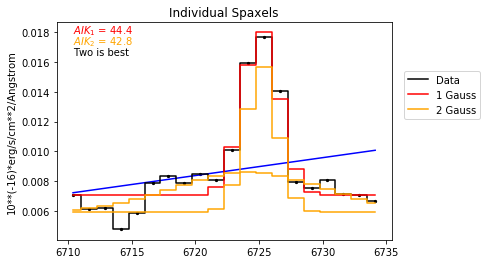

0.0051752883
(20,) (20,)
[ 1.18320394e-04 -7.84998445e-01]
best fit for 1 gauss [2.07483749e-02 6.72506489e+03 1.27362515e+00 7.73200585e-03]


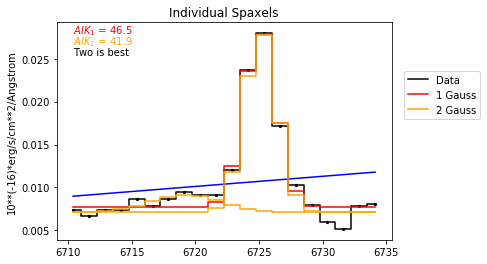

0.0063663214
(20,) (20,)
[ 1.27636039e-04 -8.46757629e-01]
best fit for 1 gauss [2.10826893e-02 6.72527844e+03 1.37717399e+00 8.33339101e-03]


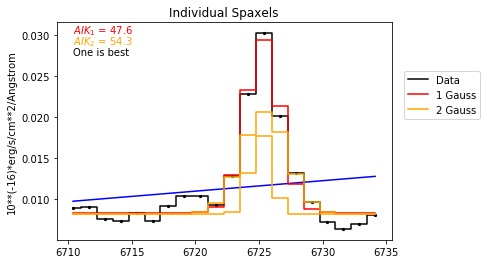

0.007227107
(20,) (20,)
[ 1.44734237e-04 -9.60973095e-01]
best fit for 1 gauss [2.17100540e-02 6.72527443e+03 1.33754208e+00 9.05603868e-03]


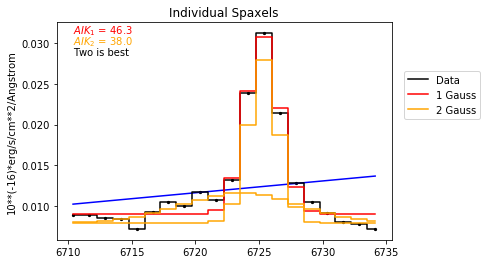

0.007835166
(20,) (20,)
[ 1.68711775e-04 -1.12121610e+00]
best fit for 1 gauss [2.35455119e-02 6.72523376e+03 1.43579897e+00 9.51807707e-03]


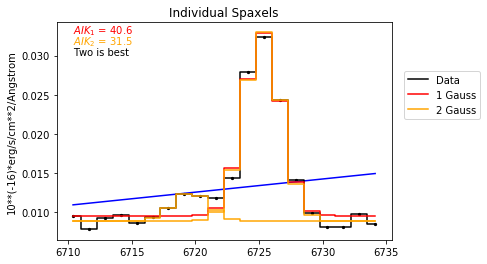

0.007714454
(20,) (20,)
[ 2.05784958e-04 -1.36927322e+00]
best fit for 1 gauss [3.14114348e-02 6.72511136e+03 1.37322277e+00 9.74109821e-03]


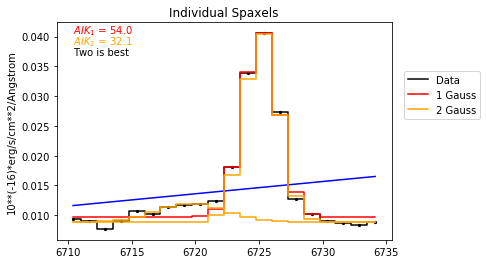

0.008082161
(20,) (20,)
[ 1.96917496e-04 -1.30821209e+00]
best fit for 1 gauss [ 3.93783550e-02  6.72495499e+03 -1.34820866e+00  1.01947025e-02]


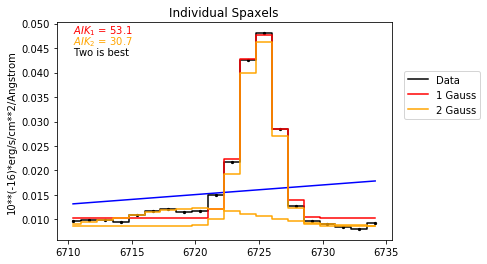

0.008951134
(20,) (20,)
[ 2.29969967e-04 -1.52819798e+00]
best fit for 1 gauss [ 4.79471246e-02  6.72484057e+03 -1.27645623e+00  1.15826182e-02]


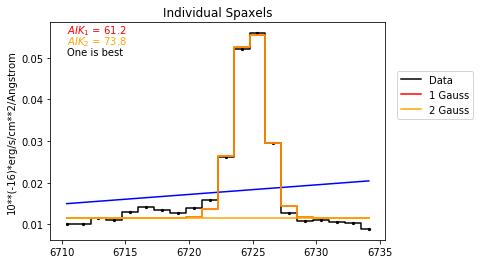

0.010295016
(20,) (20,)
[ 2.28317002e-04 -1.51370812e+00]
best fit for 1 gauss [ 5.69971105e-02  6.72471361e+03 -1.31540357e+00  1.35799913e-02]


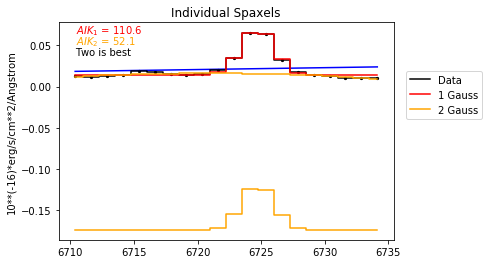

0.012171095
(20,) (20,)
[ 3.67222648e-04 -2.44413042e+00]
best fit for 1 gauss [6.88089951e-02 6.72466635e+03 1.34629961e+00 1.51460443e-02]


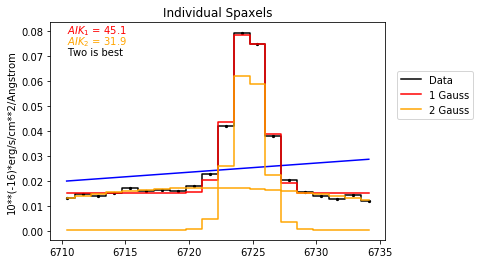

0.013811575
(20,) (20,)
[ 5.57664494e-04 -3.71963407e+00]
best fit for 1 gauss [ 9.16575867e-02  6.72460327e+03 -1.25950375e+00  1.75546983e-02]


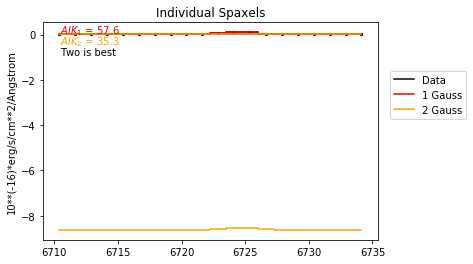

0.015820049
(20,) (20,)
[ 8.40715785e-04 -5.61523139e+00]
best fit for 1 gauss [1.31534155e-01 6.72463595e+03 1.32310442e+00 1.88261519e-02]


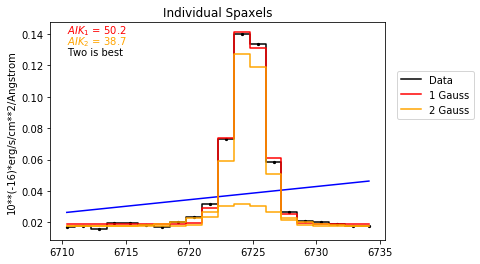

0.015698299
(20,) (20,)
[ 1.09859777e-03 -7.34109947e+00]
best fit for 1 gauss [1.93372323e-01 6.72454043e+03 1.32117335e+00 1.83408249e-02]


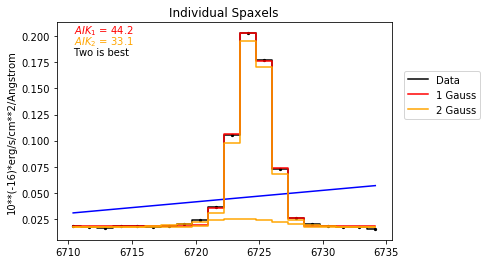

0.015625231
(20,) (20,)
[ 1.48386750e-03 -9.92182228e+00]
best fit for 1 gauss [2.68698333e-01 6.72440565e+03 1.27585255e+00 1.87426303e-02]


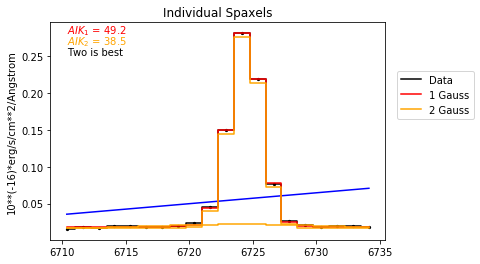

0.015789878
(20,) (20,)
[ 1.56724119e-03 -1.04796149e+01]
best fit for 1 gauss [2.83941193e-01 6.72435738e+03 1.29532874e+00 1.89048892e-02]


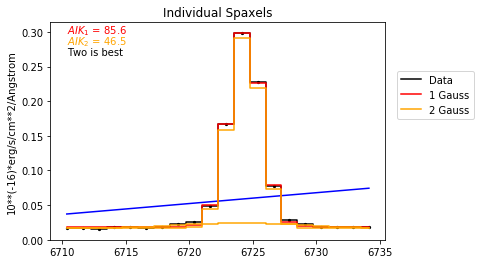

0.017009865
(20,) (20,)
[ 1.22702279e-03 -8.19939432e+00]
best fit for 1 gauss [2.30753496e-01 6.72433329e+03 1.29160389e+00 1.90841741e-02]


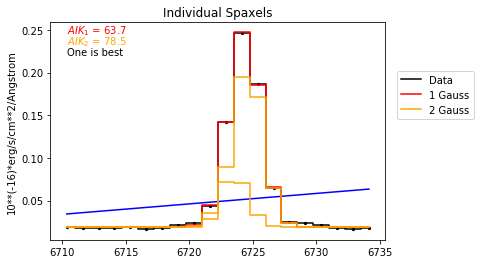

0.017361376
(20,) (20,)
[ 7.14336048e-04 -4.76465401e+00]
best fit for 1 gauss [ 1.44551021e-01  6.72426263e+03 -1.25095932e+00  1.91653414e-02]


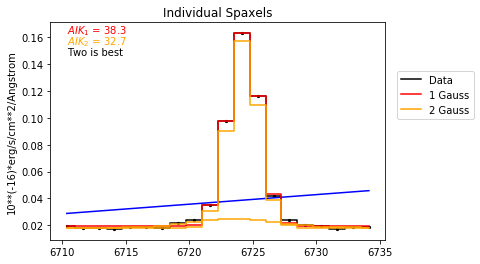

0.01617342
(20,) (20,)
[ 3.58831852e-04 -2.38388692e+00]
best fit for 1 gauss [ 7.73228785e-02  6.72427366e+03 -1.27044215e+00  1.84233069e-02]


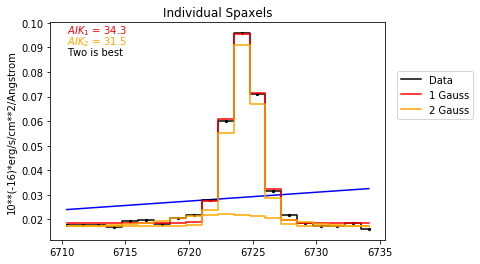

0.0150556965
(20,) (20,)
[ 2.51948256e-04 -1.67139259e+00]
best fit for 1 gauss [4.62484326e-02 6.72421266e+03 1.33611363e+00 1.60724713e-02]


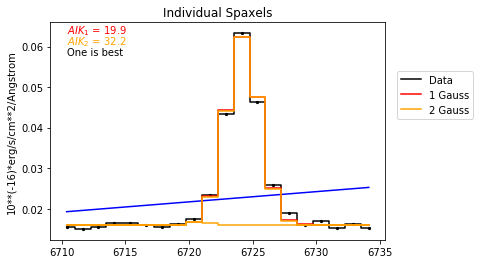

0.012352783
(20,) (20,)
[ 1.76686894e-04 -1.16946238e+00]
best fit for 1 gauss [2.96363924e-02 6.72425113e+03 1.40460524e+00 1.40984339e-02]


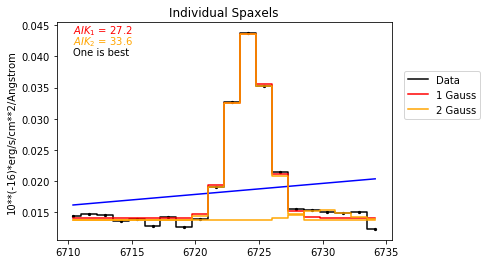

0.010708628
(20,) (20,)
[ 1.32053980e-04 -8.72266316e-01]
best fit for 1 gauss [2.16837294e-02 6.72423275e+03 1.27912562e+00 1.26534169e-02]


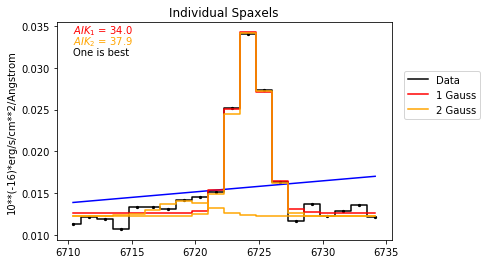

0.009713596
(20,) (20,)
[ 6.74986408e-05 -4.39849441e-01]
best fit for 1 gauss [1.92441423e-02 6.72426893e+03 1.24556319e+00 1.14903910e-02]


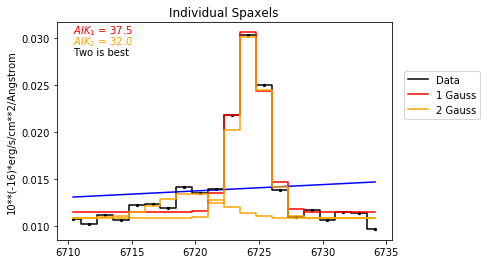

0.009685819
(20,) (20,)
[ 1.29629661e-05 -7.41525351e-02]
best fit for 1 gauss [1.56034467e-02 6.72429181e+03 1.05796925e+00 1.13326707e-02]


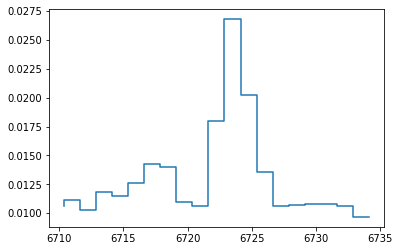

0.008865666
(20,) (20,)
[-1.36926577e-06  2.14367271e-02]
best fit for 1 gauss [1.10899447e-02 6.72426996e+03 1.28680734e+00 1.08013258e-02]


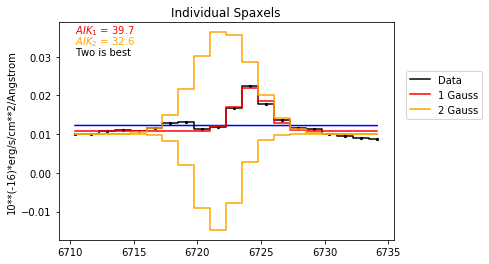

0.00768332
(20,) (20,)
[-2.38245799e-05  1.71119332e-01]
best fit for 1 gauss [8.24865000e-03 6.72453834e+03 1.38141395e+00 9.82189735e-03]


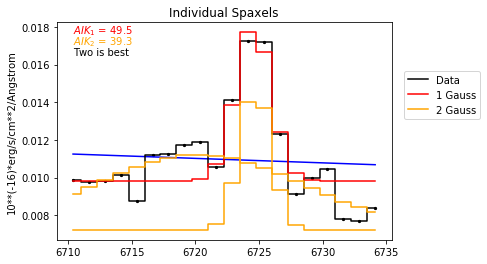

0.0075642387
(20,) (20,)
[ 1.02239282e-04 -6.77354787e-01]
best fit for 1 gauss [7.98231514e-03 6.72456966e+03 1.04339048e+00 9.08880101e-03]


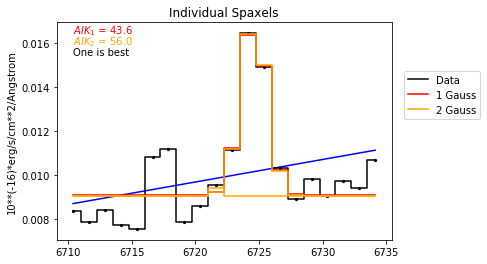

In [ ]:
# Fit a Gauss to this:
import scipy



def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]




def fit_gaussians_aik(wav, data, error, pix_x, pix_y , guess_mu):

    print(np.min(data))

    

    # first, fit a line:
    print(np.shape(wav), np.shape(data))
    poptline, pcov = scipy.optimize.curve_fit(linefit, wav, data, p0=[0.1,np.min(data)])
    print(poptline)
    line = linefit(wav, *poptline)
    #line = [line_y for x in wav[idx_1:idx_2]]
    
    guess = [np.max(data), guess_mu, 5, np.min(data)]
    popt, pcov = scipy.optimize.curve_fit(one_gauss_fit, wav,data, p0=guess)
    print('best fit for 1 gauss', popt)
    gauss_1 = one_gauss_fit(wav, *popt)

    # Now fit 2 Gauss
    guess2 = [popt[0]/2, popt[1], popt[2], popt[0]/2, popt[1]-2, popt[2], popt[3]]
    try:
        popt2, pcov2 = scipy.optimize.curve_fit(two_gauss_fit, wav,data, p0=guess2)
    except:
        plt.clf()
        plt.step(wav, data)
        plt.show()
        return 0, 0
    
    gauss_2_1 = one_gauss_fit(wav, *[popt2[0], popt2[1], popt2[2], popt2[6]])
    gauss_2_2 = one_gauss_fit(wav, *[popt2[3], popt2[4], popt2[5], popt2[6]])
    gauss_2 = two_gauss_fit(wav, *popt2)

    chi_line = np.sum(abs(line - data)**2/error**2)
    chi_1 = np.sum(abs(gauss_1 - data)**2/error**2)
    chi_2 = np.sum(abs(gauss_2 - data)**2/error**2)

    n = idx_2 - idx_1

    k = 1
    aik_line = chi_line + 2*k + 2*k*(k+1)/(n - k - 1)
    
    k = 4
    aik_1 = chi_1 + 2*k + 2*k*(k+1)/(n - k - 1)

    k = 7
    aik_2 = chi_2 + 2*k + 2*k*(k+1)/(n - k - 1)
    #AIC = chi +2k
    #AIC + 2k(k + 1)/(n − k − 1)

    plt.clf()
    plt.plot(wav, line, color='blue')
    plt.step(wav, data, color='black', where='mid', label='Data')
    plt.scatter(wav, data, color='black', s=5)
    plt.step(wav, one_gauss_fit(wav, *popt), color='red', label='1 Gauss', where='mid')
    #plt.step(wav[idx_1:idx_2], two_gauss_fit(wav[idx_1:idx_2], *popt2), color='orange', label='2 Gauss')#, where='mid')
    plt.step(wav, gauss_2_1, color='orange', where='mid', label='2 Gauss')
    plt.step(wav, gauss_2_2, color='orange', where='mid')


    plt.title('Individual Spaxels')
    plt.ylabel(str(hdulist[0].header['BUNIT']))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8))
    plt.annotate('$AIK_1$ = '+str(round(aik_1,1)), xy=(0.05, 0.95), xycoords='axes fraction', color='red')
    plt.annotate('$AIK_2$ = '+str(round(aik_2,1)), xy=(0.05, 0.9), xycoords='axes fraction', color='orange')
    
    if aik_line < aik_1 and aik_line < aik_2:
        plt.annotate('Line is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
        fit = 0
        fit_param = poptline
    else:
        if aik_2 < aik_1:
            plt.annotate('Two is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
            fit = 2
            fit_param = popt2
            
        else:
            plt.annotate('One is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
            fit = 1
            fit_param = popt
           

    #plt.xlim([6650, 6750])
    plt.show()

    
    #data, error, gauss_1, gauss_2, gauss_2_1, gauss_2_2, aik_line, aik_1, aik_2,
    return fit, fit_param

start_x = 6710
end_x = 6735
mu = 6720

idx_1 = find_nearest(wav, start_x)[0]
idx_2 = find_nearest(wav, end_x)[0]

wavecut = wav[idx_1:idx_2]

fit_n = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
for j in range(len(hdulist[0].data[1])):
    for i in range(len(hdulist[0].data[2])):
        # For each row, quickly do a S/N calculation to see if you even try to fit it
        if np.all(hdulist[0].data[idx_1:idx_2, j, i]) ==0.0:
            continue
        data = hdulist[0].data[:,j,i][idx_1:idx_2]
        error = hdulist[1].data[:,j,i][idx_1:idx_2]
        
        S_N = data/error
        if np.median(S_N) < 10:
            continue
            
        '''plt.clf()
        plt.step(wav[idx_1:idx_2],data, label='Data')
        plt.step(wav[idx_1:idx_2],error, label='Noise')
        plt.legend()
        plt.title('j = '+str(j)+', i = '+str(i))
        plt.show()'''
        
        
        out = fit_gaussians_aik(wavecut, data, error, j,i, mu)
        fit_n[j,i] = out[0]
        #if out


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


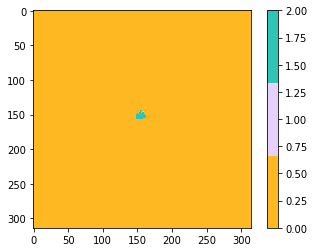

In [171]:
print(fit_n)

colorsList = ['#feb922','#e6d1fc','#2ec4b6']
CustomCmap = matplotlib.colors.ListedColormap(colorsList)

plt.clf()
plt.imshow(fit_n, cmap=CustomCmap)#'Set2')
plt.colorbar()
plt.show()

In [159]:
def one_gauss_fit(x, a, mu, sigma, cont):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))+cont
def two_gauss_fit(x, a, mu, sigma, a2, mu2, sigma2, cont):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + a2*np.exp(-(x-mu2)**2/(2*sigma2**2)) + cont
def linefit(x,m,b):
 
    return [m*i + b for i in x]


Read in the image data and header:

In [295]:
data = hdulist[0].data
header = hdulist[0].header
hdulist.close()

I want to make a movie that steps through the velocity structures of the H-alpha + [N II] emission lines. Let's find roughly where that is in the cube. 

In [296]:
ha_wavelength_at_z = 6563*u.AA * (1+z)
ha_wavelength_at_z

<Quantity 6700.823 Angstrom>

Let's first identify (roughly) which spectral channel in the MUSE cube this wavelength corresponds to. Note that the spectral axis of the MUSE cube is not "automatically" in units of wavelength. One needs to convert the spectral axis to a wavelength array using the dispersion information encoded in the FITS header, following the standard FITS `CRPIX / CRDEL` keywords. 

How do we do this? 

First, let's take a look at the shape of the cube itself:

In [297]:
np.shape(data)

(3682, 314, 319)

There are 3681 spectral elements (channels), and 219x220 spatial elements (e.g. RA, Dec "pixels" across the FOV, if you will). This is smaller than the native MUSE pixel resolution because we've binned up the data to increase S/N. 

In [298]:
number_of_channels = len(data[:,0,0])
number_of_channels

3682

You might not be familiar with how the wavelength axis is encoded in MUSE data (or all FITS images, for that matter). By the FITS standard, we encode the dispersion thusly: 
```
CUNIT3  = 'Angstrom'
CD3_3   = 1.25
CRPIX3  = 1.
CRVAL3  = 4749.70068359375    
```

__This is how you create a wavelength array__:

In [299]:
wavelength = ((np.arange(number_of_channels) + 1.0) - header['CRPIX3']) * header['CD3_3'] + header['CRVAL3']
wavelength

array([4750.38134766, 4751.63134766, 4752.88134766, ..., 9349.13134766,
       9350.38134766, 9351.63134766])

That looks better! We now have a wavelength array. Let's find which channel number corresponds to the redshifted wavelength of H$\alpha$ for this source. 

In [300]:
# This quick one liner finds the element in the wavelength array 
# that is closest to the "target" wavelength, then returns that element's 
# index. 

# It finds the deviation between each array element and the target value, 
# takes its absolute value, and then returns the index of 
# the element with the smallest value in the resulting array. 
# This is the number that is closest to the target. 

ha_channel = (np.abs(wavelength - ha_wavelength_at_z.value)).argmin()
ha_channel

1560

So we know that the H$\alpha$ line centroid should be somewhat close to the above channel. It probably won't be exact, because the emission line redshift can sometimes differ a bit from the redshift reported in NED. But it'll be very close. 

Let's plot this channel:


First, though, we'll make a temporary directory to store our movie "frames" in: 

In [301]:
temp_movie_dir = "movie/"

if not os.path.exists(temp_movie_dir):
    os.makedirs(temp_movie_dir)

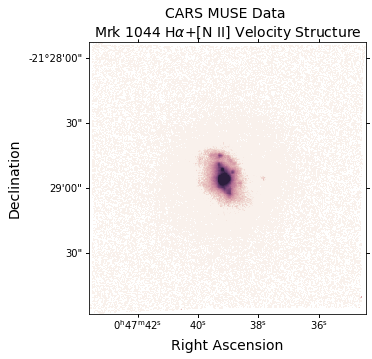

In [302]:
image = data[ha_channel,:,:]

image[image == 0] = np.nan # The reprojection makes the "background" equal to zero, which then gets mapped by the colormap. Prevent this! 

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

ax.set_title("CARS MUSE Data \n" r'Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=fontsize)


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)


frame = ax.imshow(image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')


We can do a *very* rough continuum subtraction, too. We know, for example, that 200 spectral channels blueward of the H$\alpha$ peak will always land in a line-free region of the continuum. We're only showing one channel at a time, so let's just subtract this smooth continuum-only channel from every frame of our movie, i.e.: 

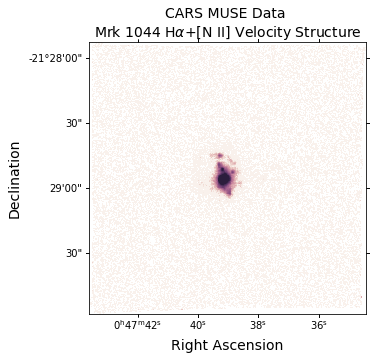

In [303]:
cont_sub_image = data[ha_channel,:,:] - data[ha_channel - 200,:,:]


cont_sub_image[cont_sub_image == 0] = np.nan # The reprojection makes the "background" equal to zero, which then gets mapped by the colormap. Prevent this! 


fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

ax.set_title("CARS MUSE Data \n" r'Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=fontsize)


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)


frame = ax.imshow(cont_sub_image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')


Not bad for a cheap continuum subtraction, right?! 

#### Now, we can make the movie! 

Hopefully the stuff below is pretty straightforward. Again, let me know if you don't understand something!

In [304]:
### How long do you want each movie? 
channels_to_show = 30 # <-- Change me
####################################

movie_start = ha_channel - channels_to_show
movie_end = ha_channel + channels_to_show


slices_of_interest = np.arange(movie_start, movie_end, 1)
png_files = []

# Clean the temporary movie directory first
# If you don't remove all "old" movie frames, your gif is gonna be messed up. 
for f in glob.glob(temp_movie_dir + "*.png"):
    os.remove(f)

for i, slice in enumerate(slices_of_interest):
    cont_sub_image = data[slice,:,:] - data[ha_channel - 200,:,:]
    cont_sub_image[cont_sub_image == 0] = np.nan
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(projection=wcs)
    ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
    ax.coords[1].set_axislabel('Declination', fontsize=fontsize)
    ax.set_title(r'CARS: Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=12)
    cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
    cmap.set_bad('white',1)
    frame = ax.imshow(cont_sub_image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')
    fig.savefig('movie/' + '{}'.format(i) + '.png', bbox_inches='tight', dpi=100, pad_inches=0)
    png_files.append('movie/' + '{}'.format(i) + '.png')
    plt.close(fig) # don't spam me with a gajillion figures

In [306]:
gif_name = 'images/movie.gif'

gif_frames = []

# Remove any old GIFs you might have made
if os.path.isfile(gif_name):
    os.remove(gif_name)

for filename in png_files:
    gif_frames.append(imageio.imread(filename))

imageio.mimsave(gif_name, gif_frames)



FileNotFoundError: The directory '/Users/beckynevin/CfA_Code/CARS_data/images' does not exist

In [ ]:
import random
__counter__ = random.randint(0,2e9)

from IPython.display import HTML, display
display(HTML('<img src={}>'.format(gif_name)))

The movie should look like this: 

![Learn to make this movie](images/movie.gif)


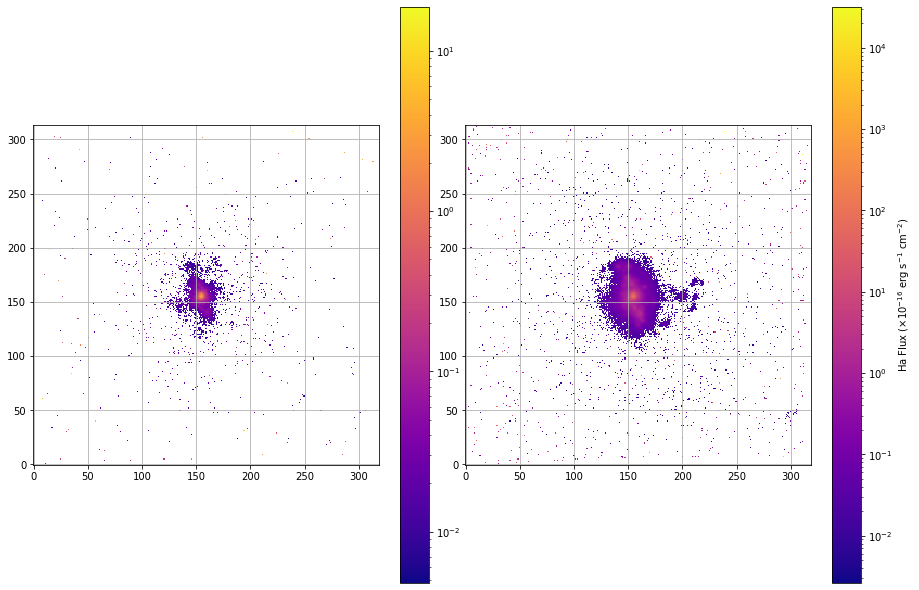

In [307]:
'''Now Becky wants to do the same thing for OIII and plot side by side with Halpha'''

gas_select = (OIII5007_flux / OIII5007_flux_err > 3)

OIII_flux_map = np.full((dim[0],dim[1]) ,np.nan)
OIII_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = OIII5007_flux[gas_select]

fig = plt.figure()

ax = plt.axes([0,0,1,2])

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar1 = plt.colorbar()
cbar1.set_label(r"[OIII]5007 Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")
ax.set_label('OIII')

ax1 = plt.axes([1,0,1,2])

ax1.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax1.set_label('Halpha')
cbar.set_label(r"Ha Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")

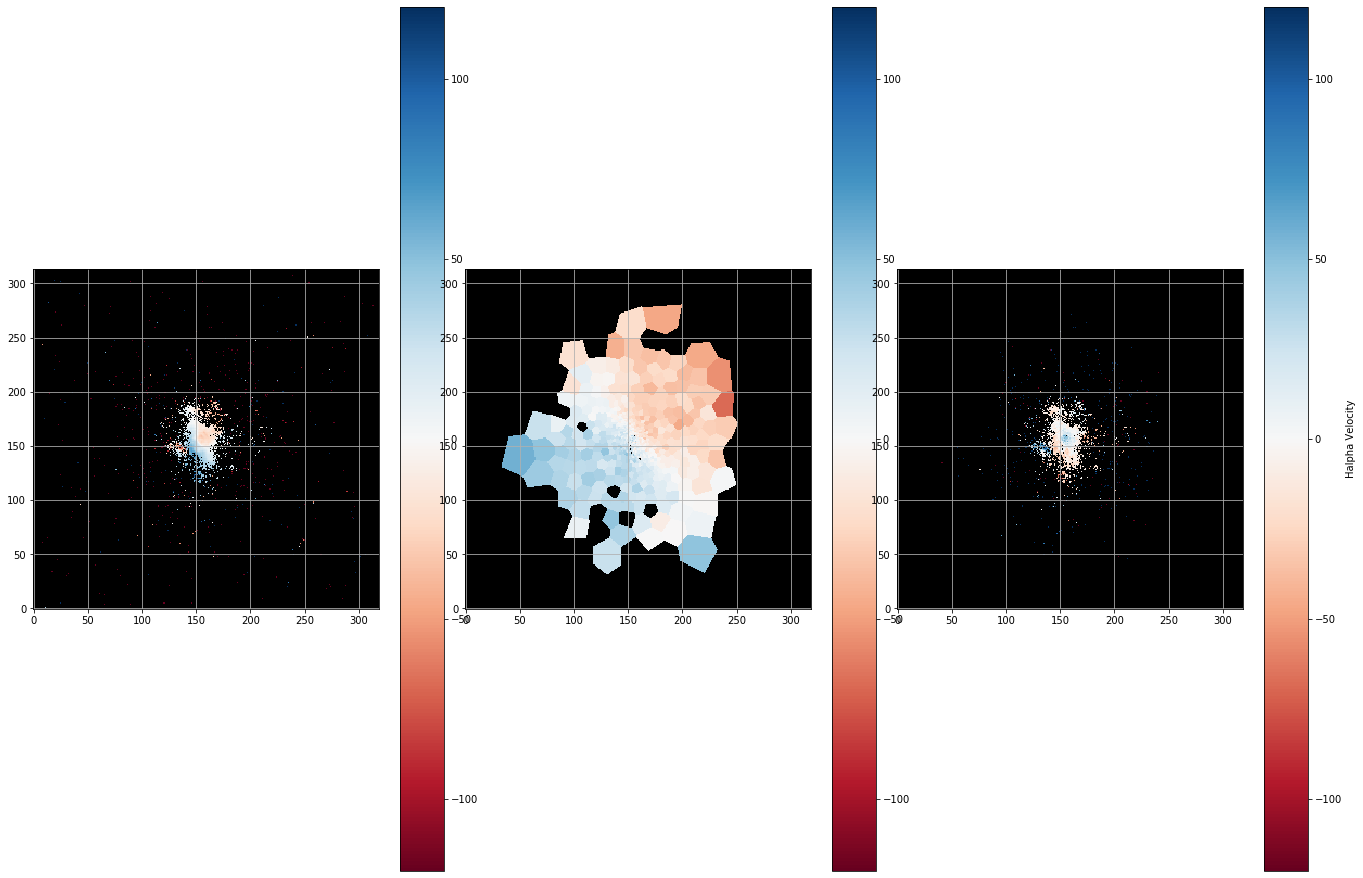

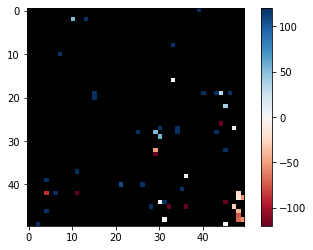

In [308]:
median_OIII_vel = np.median(OIII5007_vel[gas_select])

OIII_vel_map = np.full((dim[0],dim[1]) ,np.nan)
OIII_vel_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = OIII5007_vel[gas_select] - median_OIII_vel

fig = plt.figure()

ax = plt.axes([0,0,1,3])

ax.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(OIII_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"OIII Velocity")

ax1 = plt.axes([1,0,1,3])

ax1.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Halpha Velocity")


ax2 = plt.axes([2,0,1,3])

ax2.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(stellar_vel_map-OIII_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Halpha Velocity")

plt.show()

plt.clf()
plt.imshow((stellar_vel_map-OIII_vel_map)[75:125,75+25:125+25], cmap=cmap, vmin=-120, vmax=120)
plt.colorbar()
plt.show()

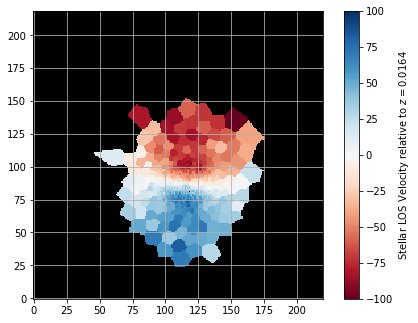

In [71]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])
ax.grid('off')

cmap = cm.RdBu
cmap.set_bad('black',1) # I make the NANs black here because white is included in my colormap, encoding values near zero

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap, vmin=-100, vmax=100, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Stellar LOS Velocity relative to $z=0.0164$")

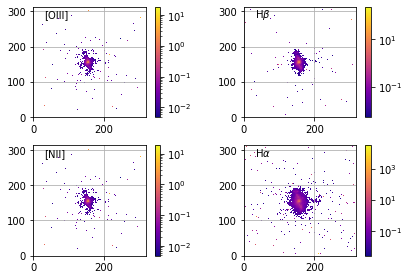

In [309]:
'''What about making BPT ratios?'''

gas_select = (NII6583_flux / NII6583_flux_err > 3)

NII_flux_map = np.full((dim[0],dim[1]) ,np.nan)
NII_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = NII6583_flux[gas_select]

gas_select = (Hb_flux / Hb_flux_err > 3)

Hb_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Hb_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Hb_flux[gas_select]


fig = plt.figure()

ax = fig.add_subplot(221)

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar1 = plt.colorbar()

ax.annotate('[OIII]', xy=(0.1,0.9), xycoords='axes fraction')


ax1 = fig.add_subplot(222)

ax1.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Hb_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax1.annotate(r'H$\beta$', xy=(0.1,0.9), xycoords='axes fraction')

ax2 = fig.add_subplot(223)

ax2.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(NII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar2 = plt.colorbar()
#cbar1.set_label(r"[OIII]5007 Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")
#ax.set_label('OIII')
ax2.annotate('[NII]', xy=(0.1,0.9), xycoords='axes fraction')


ax3 = fig.add_subplot(224)

ax3.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax3.annotate(r'H$\alpha$', xy=(0.1,0.9), xycoords='axes fraction')

plt.tight_layout()
plt.show()



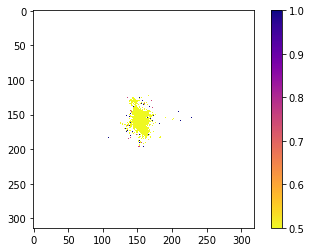

In [310]:
import math
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#Kewley: log([O III]/Hβ) < 0.61/[log([N II]/Hα) − 0.05] + 1.3
xs_kew = np.linspace(-2,0,100)
ys_kew = [0.61/(x-0.05) + 1.3 for x in xs_kew]

#Composite: 0.61/[log([N II]/Hα) − 0.47] + 1.19 > log([O III]/Hβ)
xs_comp = np.linspace(-2,0.4,100)
ys_comp = [0.61/(x-0.47) + 1.19 for x in xs_comp]

spatial_BPT = np.zeros((np.shape(Ha_flux_map)[0], np.shape(Ha_flux_map)[1]))
for i in range(np.shape(Ha_flux_map)[0]):
    for j in range(np.shape(Ha_flux_map)[1]):
        if np.isnan(OIII_flux_map[i,j]) or np.isnan(Hb_flux_map[i,j]) or np.isnan(NII_flux_map[i,j]) or np.isnan(Ha_flux_map[i,j]):
            continue
        else:
            OIII_Hbeta_ratio = math.log(OIII_flux_map[i,j]/Hb_flux_map[i,j])
            NII_Halpha_ratio = math.log(NII_flux_map[i,j]/Ha_flux_map[i,j])
            
            if NII_Halpha_ratio > (0.61/(OIII_Hbeta_ratio-0.05)+1.3):#Then it is an AGN
                spatial_BPT[i,j]=1.0
            else:
                if NII_Halpha_ratio > (0.61/(OIII_Hbeta_ratio-0.47)+1.19):#Then its a composite
                    spatial_BPT[i,j]=0.75
                else:#SF
                    spatial_BPT[i,j]=0.5
                    
spatial_BPT_ma = np.ma.masked_where(spatial_BPT==0,spatial_BPT)

plt.clf()
plt.imshow(np.flipud(spatial_BPT_ma), cmap='plasma_r')
plt.colorbar()
plt.show()

In [ ]:
'''It might be nice to look at this for a bunch of different galaxies, I for one an surprised it is not dominated by AGN-like emission'''


In [109]:
'''It also might be nice to use the shock diagnostics from Comerford et al. 2017'''

'''Cannot do this because we do not have 4363 :('''

NameError: name 'OIII4363_flux' is not defined